**Author**: David Schenck <br>
**GitHub**: https://github.com/daviderics/mls_attendance <br>
November, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from exploration_visuals import *

### Data Exploration

In this notebook, I look for patterns in the data using a variety of visualizations (scatterplots, histograms, bar charts, tables). I am primarily looking for how attendance relates to other features, but I will also look for evidence of relations between features.

Read in the data that was created in collect_match_weather_data.ipynb

In [2]:
mlsall_df = pd.read_csv('mls_with_weather.csv', index_col=0)
mlsall_df

round  day        date  local_time  home_team  home_score  \
0      Regular Season  Sat  2018-03-03        13.0         27           0   
1      Regular Season  Sat  2018-03-03        14.5          9           4   
2      Regular Season  Sun  2018-03-04        14.0         24           0   
3      Regular Season  Sun  2018-03-04        15.0         28           2   
4      Regular Season  Sat  2018-03-03        19.0         20           2   
...               ...  ...         ...         ...        ...         ...   
2280   Regular Season  Sat  2023-10-21        19.0          5           0   
2281   Regular Season  Sat  2023-10-21        20.0         26           0   
2282   Regular Season  Sat  2023-10-21        20.0         25           3   
2283  Wild Card Round  Wed  2023-10-25        19.5         18           5   
2284  Wild Card Round  Wed  2023-10-25        20.5         25           0   

      away_score  away_team  attendance                     stadium  ...  \
0              2          6       26633                   BMO Field  ...   
1              0          0       20377        BBVA Compass Stadium  ...   
2              1         11       40070           CenturyLink Field  ...   
3              1         14       27837                    BC Place  ...   
4              0         16       16452        Talen Energy Stadium  ...   
...          ...        ...         ...                         ...  ...   
2280           1         22       17538  Dick's Sporting Goods Park  ...   
2281           2         24       22423                    Citypark  ...   
2282           1         12       20479       Children's Mercy Park  ...   
2283           2          2       16074              Red Bull Arena  ...   
2284           0         23       17437       Children's Mercy Park  ...   

      snow  cloudcover  windspeed  windgust  rain_sum  snow_sum  date_year  \
0      0.0         1.0       21.6      42.5       0.0      0.00       2018   
1      0.0        40.0       13.6      23.4       0.0      0.00       2018   
2      0.0        27.0        7.2      18.0       0.0      0.00       2018   
3      0.0        65.0        7.6      15.5       0.0      0.00       2018   
4      0.0        14.0       27.3      61.9       0.0      0.91       2018   
...    ...         ...        ...       ...       ...       ...        ...   
2280   0.0        18.0        8.7      24.8       0.0      0.00       2023   
2281   0.0         0.0       22.4      45.4       0.0      0.00       2023   
2282   0.0         0.0       14.0      30.2       0.0      0.00       2023   
2283   NaN         NaN        NaN       NaN       NaN       NaN       2023   
2284   NaN         NaN        NaN       NaN       NaN       NaN       2023   

      date_month  date_day  home_opener  
0              3         3            1  
1              3         3            1  
2              3         4            1  
3              3         4            1  
4              3         3            1  
...          ...       ...          ...  
2280          10        21            0  
2281          10        21            0  
2282          10        21            0  
2283          10        25            0  
2284          10        25            0  

[2285 rows x 29 columns]

There are some matches that have an attendance of 0. This either means that the attendance was not recorded or no fans were allowed into the stadium due to the COVID pandemic. There is no reason to include these matches, so they are dropped below.

Also, there may be missing weather data for more recent matches. Those matches are also dropped.

In [3]:
mlsall_df.dropna(inplace=True)
mlsall_df.drop(mlsall_df[mlsall_df['attendance']==0].index, inplace=True)
mlsall_df

round  day        date  local_time  home_team  home_score  \
0     Regular Season  Sat  2018-03-03        13.0         27           0   
1     Regular Season  Sat  2018-03-03        14.5          9           4   
2     Regular Season  Sun  2018-03-04        14.0         24           0   
3     Regular Season  Sun  2018-03-04        15.0         28           2   
4     Regular Season  Sat  2018-03-03        19.0         20           2   
...              ...  ...         ...         ...        ...         ...   
2278  Regular Season  Sat  2023-10-21        18.0         21           1   
2279  Regular Season  Sat  2023-10-21        18.0         28           1   
2280  Regular Season  Sat  2023-10-21        19.0          5           0   
2281  Regular Season  Sat  2023-10-21        20.0         26           0   
2282  Regular Season  Sat  2023-10-21        20.0         25           3   

      away_score  away_team  attendance                     stadium  ...  \
0              2          6       26633                   BMO Field  ...   
1              0          0       20377        BBVA Compass Stadium  ...   
2              1         11       40070           CenturyLink Field  ...   
3              1         14       27837                    BC Place  ...   
4              0         16       16452        Talen Energy Stadium  ...   
...          ...        ...         ...                         ...  ...   
2278           3          9       25218             Providence Park  ...   
2279           1         11       25146            BC Place Stadium  ...   
2280           1         22       17538  Dick's Sporting Goods Park  ...   
2281           2         24       22423                    Citypark  ...   
2282           1         12       20479       Children's Mercy Park  ...   

      snow  cloudcover  windspeed  windgust  rain_sum  snow_sum  date_year  \
0      0.0         1.0       21.6      42.5       0.0      0.00       2018   
1      0.0        40.0       13.6      23.4       0.0      0.00       2018   
2      0.0        27.0        7.2      18.0       0.0      0.00       2018   
3      0.0        65.0        7.6      15.5       0.0      0.00       2018   
4      0.0        14.0       27.3      61.9       0.0      0.91       2018   
...    ...         ...        ...       ...       ...       ...        ...   
2278   0.0       100.0        3.2      14.0       0.0      0.00       2023   
2279   0.0        93.0        4.4      11.9       0.0      0.00       2023   
2280   0.0        18.0        8.7      24.8       0.0      0.00       2023   
2281   0.0         0.0       22.4      45.4       0.0      0.00       2023   
2282   0.0         0.0       14.0      30.2       0.0      0.00       2023   

      date_month  date_day  home_opener  
0              3         3            1  
1              3         3            1  
2              3         4            1  
3              3         4            1  
4              3         3            1  
...          ...       ...          ...  
2278          10        21            0  
2279          10        21            0  
2280          10        21            0  
2281          10        21            0  
2282          10        21            0  

[2229 rows x 29 columns]

Below, I look at the datatypes of the columns

In [4]:
mlsall_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2282
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   round             2229 non-null   object 
 1   day               2229 non-null   object 
 2   date              2229 non-null   object 
 3   local_time        2229 non-null   float64
 4   home_team         2229 non-null   int64  
 5   home_score        2229 non-null   int64  
 6   away_score        2229 non-null   int64  
 7   away_team         2229 non-null   int64  
 8   attendance        2229 non-null   int64  
 9   stadium           2229 non-null   object 
 10  latitude          2229 non-null   float64
 11  longitude         2229 non-null   float64
 12  playoff           2229 non-null   int64  
 13  att_div_capacity  2229 non-null   float64
 14  real_home_team    2229 non-null   int64  
 15  same_conf         2229 non-null   int64  
 16  rivals            2229 non-null   int64  
 17  

There are 2,229 matches included and there is no missing data. Aside from round, day, date, and stadium, each column is numerical.

The target variable is att_div_capacity which represents the attendance divided by the capacity of the stadium.

Below, I create a list of just the numerical features. The list will be useful for using the groupby method later.

In [5]:
# Make list of numerical features
num_feats = ['attendance','att_div_capacity','local_time','latitude','longitude','real_home_team','temperature','rain',
             'snow','cloudcover','windspeed','windgust','rain_sum','snow_sum','playoff','same_conf','rivals','home_opener']
num_feats

['attendance',
 'att_div_capacity',
 'local_time',
 'latitude',
 'longitude',
 'real_home_team',
 'temperature',
 'rain',
 'snow',
 'cloudcover',
 'windspeed',
 'windgust',
 'rain_sum',
 'snow_sum',
 'playoff',
 'same_conf',
 'rivals',
 'home_opener']

In [6]:
# Statistical summary of each column
mlsall_df[num_feats].describe()

attendance  att_div_capacity   local_time     latitude    longitude  \
count   2229.000000       2229.000000  2229.000000  2229.000000  2229.000000   
mean   20816.380888          0.851896    18.332473    38.792813   -93.978528   
std     9397.534830          0.230473     2.084245     5.568967    17.569694   
min       16.000000          0.000627    12.000000    26.190000  -123.110000   
25%    15891.000000          0.729566    18.000000    33.860000  -111.890000   
50%    19267.000000          0.885833    19.500000    39.810000   -87.810000   
75%    22548.000000          1.000000    19.500000    42.090000   -79.420000   
max    82110.000000          2.489441    22.500000    49.280000   -71.260000   

       real_home_team  temperature         rain         snow   cloudcover  \
count     2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean         0.992373    70.385509     0.202602     0.001539    44.445491   
std          0.087017    15.817319     0.799053     0.025939    36.129931   
min          0.000000    13.700000     0.000000     0.000000     0.000000   
25%          1.000000    59.100000     0.000000     0.000000    10.000000   
50%          1.000000    73.900000     0.000000     0.000000    37.000000   
75%          1.000000    82.600000     0.000000     0.000000    80.000000   
max          1.000000   106.300000    11.400000     0.910000   100.000000   

         windspeed     windgust     rain_sum     snow_sum      playoff  \
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean     11.416689    27.389009     1.999148     0.036460     0.025123   
std       6.240625    11.119089     5.263974     0.518189     0.156535   
min       0.000000     3.600000     0.000000     0.000000     0.000000   
25%       6.800000    19.800000     0.000000     0.000000     0.000000   
50%      10.500000    25.600000     0.000000     0.000000     0.000000   
75%      14.800000    33.100000     1.000000     0.000000     0.000000   
max      44.700000    88.600000    57.400000    19.040000     1.000000   

         same_conf       rivals  home_opener  
count  2229.000000  2229.000000  2229.000000  
mean      0.773890     0.081202     0.054284  
std       0.418405     0.273207     0.226629  
min       0.000000     0.000000     0.000000  
25%       1.000000     0.000000     0.000000  
50%       1.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

The average attendance for the matches in the dataset is around 20,800. On average, MLS stadiums were 85% full. These numbers are a good baseline to keep in mind as I start slicing the data.

The average temperature at kick off was about 70 degrees Fahrenheit, with the values ranging from 13.7 to 106.3 degrees.

In [7]:
# I will use the blue and red from the MLS logo in some figures
mls_blue = '#001F5B'
mls_red = '#DF231A'

**Target Variable: Attendance**

First, I want to look at the distribution of attendance.

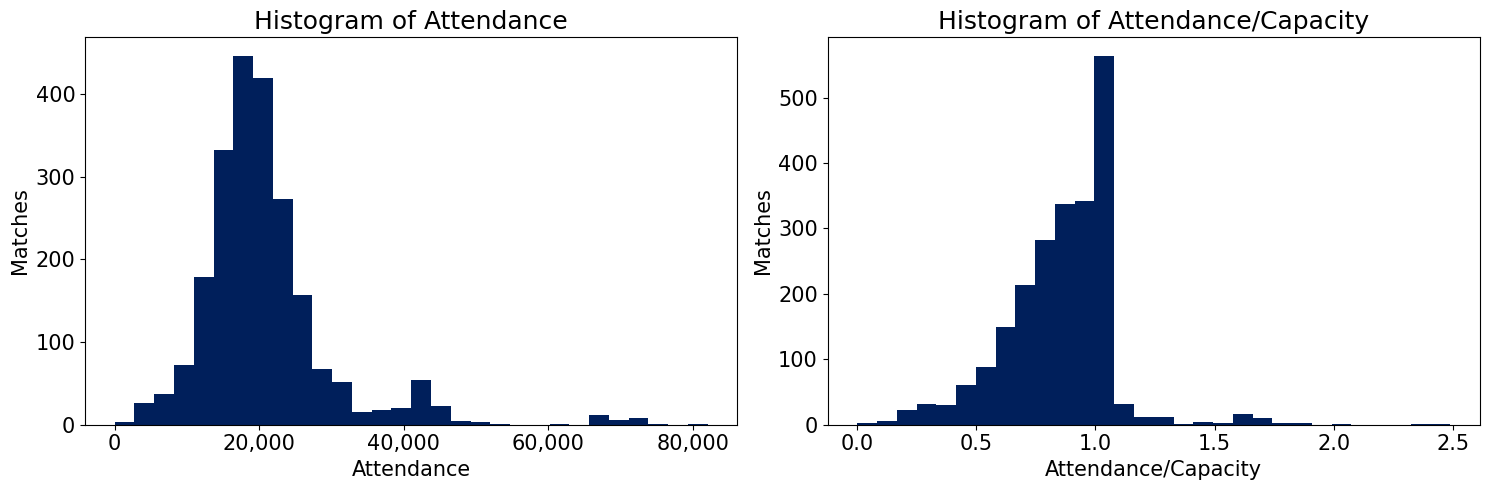

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

mlsall_df['attendance'].plot.hist(bins=30,
                                  ax=ax[0],
                                  fontsize=15,
                                  color=mls_blue)

ax[0].set_xlabel('Attendance',fontsize=15)
ax[0].set_ylabel('Matches', fontsize=15)
ax[0].set_title('Histogram of Attendance',fontsize=18)
ax[0].set_xticks(np.arange(5)*20000)
ax[0].set_xticklabels(['0','20,000','40,000','60,000','80,000'])

mlsall_df['att_div_capacity'].plot.hist(bins=30,
                                        ax=ax[1],
                                        fontsize=15,
                                        color=mls_blue)

ax[1].set_xlabel('Attendance/Capacity',fontsize=15)
ax[1].set_ylabel('Matches', fontsize=15)
ax[1].set_title('Histogram of Attendance/Capacity',fontsize=18)

fig.tight_layout()

I have two choices for the target variable for this project: raw attendance or attendance divided by stadium capacity. Different teams have different sized stadiums, so something must be done to account for this. Using attendance divided by capacity can fix it, but I also plan on using separate parameters for each home team in the model which could also account for these differences. It will be much easier to handle raw attendance when creating the models, so I plan on using raw attendance.

One might think that the attendance/capacity could not exceed 1 (how could the attendance be 1.5 times the capacity?), but there are a fair number of matches with values above 1. The reason for this is that some teams artifically reduce the capacity of their stadium most of the time, but on special occasions, they will use the full capacity. An example of this is the Seattle Sounders who share Lumen Field with the Seattle Seahawks of the NFL. The actual capacity of the stadium is 72,000, but the Sounders typically cap attendance at just below 38,000. However, the Sounders will use the full stadium for special occasions like playoff games or matches against rivals.

I considered rounding every value above 1 down to 1, but decided against it. The reason to round down would be to correct for the changing capacity of some stadiums from match to match. However, I figured that a match should get credit for its inflated attendance because there was likely a compelling reason why the capacity was increased. Therefore, I will leave the values that are above 1 as they are.

**Attendance vs. Month**

Below, I look at the distribution of matches by month and the attendance by month.

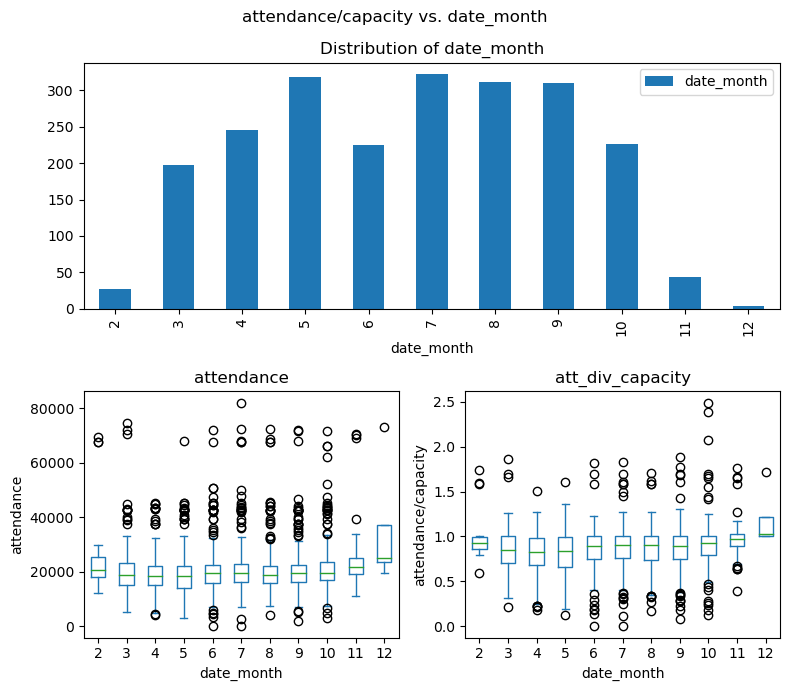

In [9]:
make_bar_box(mlsall_df, 'date_month', figsize=(8,7))

Most matches are played between March and October. A smaller number of matches are played in February, November, and December.

The reason fewer matches have been in February is because MLS currently starts the season in late February, so they don't use the whole month. In fact, MLS used to start the season in March, avoiding February entirely.

The reason there are fewer matches in November and December is because this is when the playoffs are held.

In [10]:
# Group by month
mlsall_df.groupby('date_month').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude   longitude  \
date_month                                                                      
2           26163.148148          0.979038   17.240741  36.310000  -95.855185   
3           20765.015152          0.836999   17.329545  38.498485  -93.147727   
4           19322.179592          0.802260   17.865306  38.843837  -92.648245   
5           19150.311321          0.783570   18.143082  38.701730  -94.029780   
6           21328.648889          0.858731   18.742222  39.184400  -94.173733   
7           21225.347826          0.870895   19.078934  38.811304  -94.250280   
8           20640.752412          0.857170   19.146034  38.742958  -93.691768   
9           20882.954839          0.867673   18.592204  38.948742  -94.815548   
10          22139.203540          0.903899   17.486357  38.535531  -93.726991   
11          25237.255814          0.993807   16.906977  40.271395  -97.451395   
12          35735.500000          1.192861   15.625000  41.155000 -101.290000   

            real_home_team  temperature      rain      snow  cloudcover  \
date_month                                                                
2                 1.000000    47.370370  0.203704  0.007778   69.777778   
3                 0.984848    48.925253  0.145960  0.010960   51.606061   
4                 0.991837    58.677551  0.181224  0.004286   50.983673   
5                 0.996855    69.046855  0.212579  0.000000   49.792453   
6                 0.986667    77.578222  0.194667  0.000000   38.395556   
7                 0.996894    82.728261  0.170497  0.000000   37.770186   
8                 0.993569    81.895820  0.335370  0.000000   41.147910   
9                 0.993548    75.291613  0.217097  0.000000   42.090323   
10                0.986726    64.000000  0.116372  0.000000   45.407080   
11                1.000000    47.888372  0.097674  0.000000   33.651163   
12                1.000000    40.850000  1.100000  0.000000   71.750000   

            windspeed   windgust  rain_sum  snow_sum   playoff  same_conf  \
date_month                                                                  
2            9.251852  22.214815  1.448148  0.194444  0.000000   0.629630   
3           14.048990  31.116162  2.292929  0.348586  0.000000   0.707071   
4           14.571020  32.659184  2.429796  0.023714  0.000000   0.681633   
5           11.687421  27.818553  2.238679  0.000000  0.000000   0.745283   
6           10.888889  27.561778  2.410667  0.000000  0.000000   0.724444   
7           10.224845  26.158075  1.304658  0.000000  0.000000   0.773292   
8            9.892926  25.369132  2.083923  0.000000  0.000000   0.813505   
9           10.337097  25.084194  1.520968  0.000000  0.000000   0.790323   
10          11.686726  26.862389  2.110177  0.004956  0.115044   0.933628   
11           9.467442  22.172093  1.665116  0.001628  0.604651   0.953488   
12          14.475000  31.750000  6.300000  0.000000  1.000000   0.500000   

              rivals  home_opener  
date_month                         
2           0.000000     1.000000  
3           0.035354     0.358586  
4           0.048980     0.073469  
5           0.078616     0.009434  
6           0.062222     0.008889  
7           0.102484     0.000000  
8           0.131833     0.000000  
9           0.083871     0.000000  
10          0.088496     0.000000  
11          0.069767     0.000000  
12          0.000000     0.000000

The highest attendance values occur in February, November, and December. The attendance is likely high in February because people are excited for the new season. It is also possible that this is just due to a small sample size since there are not that many matches in February and two of them happened to have very high attendance.

Attendance is high in November and December because that is when the playoffs are happening and the playoffs are the most exciting part of the season. In fact, the attendance in December is 119% capacity. This is because MLS Cup, the championship match, is held in December. Since that match decides the champion, there is high demand for tickets and a stadium's full capacity will be used rather than the artifically reduced capacity.

The attendance in March through May was below the average of 85% while the attendance from June to October was above the average. This seems to indicate that the attendance improves as the season progresses.

The average temperature at kick-off was pretty low for November and December (47.9 and 40.9 degrees Fahrenheit, respectively), but the attendance was still very good. This shows that people are willing to deal with low temperatures to attend playoff matches.

There are also a couple interesting trends I saw in the table that are not directly related to attendance.
1. The kick-off time (local_time) is earlier at the beginning and end of the season, but later in the middle of the season. I think the most likely reason for this is that this helps manage temperature. During the winter, MLS has earlier kick-off times because it gets too cold later in the night. During the summer, the kick-off times are later to allow for the temperature to drop to a more comfortable level. Importantly, MLS abandoned this strategy in 2023 by making kick-off times more consistent (see next cell).

2. The average longitude in February was about 2 degrees lower than the other months in which regular season games are played (March through October). This might be due to smaller sample size (because fewer games are played in February), but it could also be intentional. By playing February matches at locations at lower latitudes, MLS avoids playing matches in very cold conditions (Canada winters can be brutal). In fact, MLS used to start the season in mid-March to avoid playing in February altogether, but they have been forced to start earlier because they have to play so many matches between MLS and other competitions.

**Attendance in Home Openers**

Above, I saw that matches in February had higher attendance than any other month in which regular season matches are played. I hypothesized that the reason for this is that home openers (first home game of the season) have higher attendance because fans are excited for the start of the season. The 'home_opener' column indicates whether a match was a home opener. Let's check if that correlates with a change in attendance.

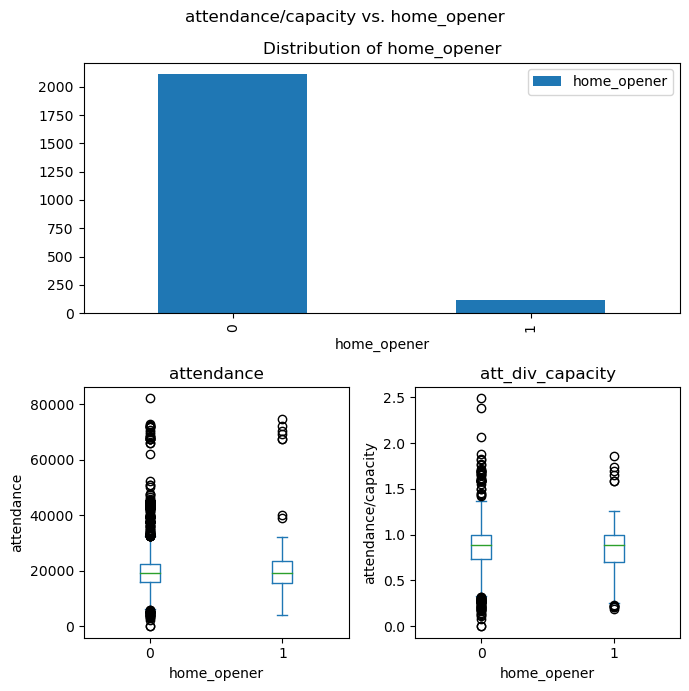

In [11]:
make_bar_box(mlsall_df, 'home_opener')

In [12]:
# Compare home openers to non-home openers
mlsall_df[mlsall_df['playoff']==0].groupby('home_opener').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude  longitude  \
home_opener                                                                     
0            20623.130604          0.848363   18.442779  38.780599 -93.961852   
1            21330.404959          0.844244   17.008264  38.668182 -93.633719   

             real_home_team  temperature      rain      snow  cloudcover  \
home_opener                                                                
0                  0.992690    72.210429  0.206238  0.001160   43.684211   
1                  0.991736    47.233884  0.133884  0.008678   58.669421   

             windspeed   windgust  rain_sum  snow_sum  playoff  same_conf  \
home_opener                                                                 
0            11.395565  27.487329  2.002973  0.016579      0.0   0.774854   
1            12.000000  26.737190  2.010744  0.389917      0.0   0.685950   

               rivals  home_opener  
home_opener                         
0            0.083821          0.0  
1            0.033058          1.0

Home openers averaged 21,330 (84.4%) attendance while other regular season matches averaged 20,623 (84.8%). There does not appear to be a strong trend here.

**Attendance vs. Day of the Week**

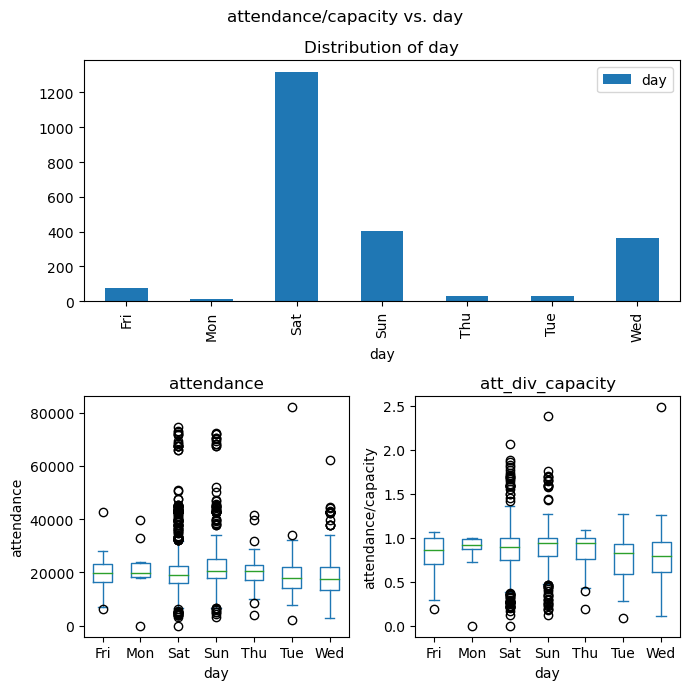

In [13]:
make_bar_box(mlsall_df, 'day')

Most matches have been held on Saturdays with Sundays and Wednesdays the next most frequent. MLS used to hold a single match on Fridays, but they abandoned that for the 2023 season. A small number of matches have been held on Mondays, Tuesdays, and Thursdays.

It looks as though matches held on weekends have higher attendance. Let's confirm that below by looking at the mean values for each day.

In [14]:
# Group by day
mlsall_df.groupby('day').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude   longitude  \
day                                                                      
Fri  19757.041096          0.825588   19.450913  38.783151  -98.473562   
Mon  21423.800000          0.825168   18.950000  39.553000 -101.327000   
Sat  20729.835481          0.865025   18.397207  38.888688  -93.331092   
Sun  23227.210918          0.899636   16.704715  38.805037  -95.238809   
Thu  20889.000000          0.853490   19.453125  36.927500  -95.019688   
Tue  20713.600000          0.765152   19.483333  37.002000  -98.483333   
Wed  18646.784530          0.764002   19.471685  38.724116  -93.359724   

     real_home_team  temperature      rain      snow  cloudcover  windspeed  \
day                                                                           
Fri        1.000000    73.989041  0.321918  0.012466   35.123288  11.502740   
Mon        0.900000    69.680000  0.060000  0.000000   38.200000  11.800000   
Sat        0.994693    69.298180  0.204625  0.001751   46.823351  11.859666   
Sun        0.987593    66.628040  0.159305  0.000521   44.218362  10.232506   
Thu        1.000000    74.196875  0.331250  0.000000   36.031250  10.365625   
Tue        0.966667    76.566667  0.063333  0.000000   33.400000   9.960000   
Wed        0.991713    76.974033  0.223481  0.000000   39.745856  11.306630   

      windgust  rain_sum  snow_sum   playoff  same_conf    rivals  home_opener  
day                                                                             
Fri  27.915068  1.672603   0.00863  0.000000   0.821918  0.191781     0.027397  
Mon  26.560000  1.030000   0.14000  0.200000   0.700000  0.000000     0.100000  
Sat  28.173920  2.132600   0.05376  0.009098   0.753601  0.078089     0.069750  
Sun  24.916377  1.635980   0.02067  0.057072   0.791563  0.091811     0.064516  
Thu  26.050000  1.868750   0.00000  0.312500   0.781250  0.156250     0.000000  
Tue  24.376667  0.696667   0.00000  0.133333   0.733333  0.100000     0.000000  
Wed  27.566575  2.129282   0.00000  0.013812   0.823204  0.052486     0.000000

The best percentage attendance was on Sundays where the attendance was at 90% capacity on average. Saturday has the second highest attendance at 86%. Mondays and Fridays both have 82.5% attendance on average while Tuesdays and Wednesdays have 76.5%, far below average.

In terms of raw attendance, Mondays outperformed Saturdays, but that might be due to the low sample size of Monday matches.

Another interesting trend is that matches on Sundays started about an hour and a half earlier than matches on Saturdays. This might indicate that earlier matches could be a good thing if it is not a school/work day.

**Does Attendance on Sundays decline when NFL starts?**

The main reason MLS plays out of sync with European soccer is to avoid cold winter weather, but another argument that has been made is that MLS wants to avoid going head-to-head with the NFL as much as possible. The worry is that MLS attendance would tank if sports fans could go to NFL games instead of MLS matches. Below, I check that assumption by looking at the attendance of Sunday MLS regular season matches before and after the NFL season starts. NFL usually starts in early September, so I will use that as the cutoff. I only include regular season matches because the playoffs would boost attendance and bias the comparison.

In [15]:
# Sunday, regular season matches before NFL starts
mlsall_df.loc[(mlsall_df['date_month']<9)&\
              (mlsall_df['day']=='Sun')&\
              (mlsall_df['playoff']==0)].agg({'attendance':'mean','att_div_capacity':'mean','day':'count'})

attendance          23683.338843
att_div_capacity        0.870035
day                   242.000000
dtype: float64

In [16]:
# Sunday, regular season matches after NFL starts
mlsall_df.loc[(mlsall_df['date_month']>=9)&\
              (mlsall_df['day']=='Sun')&\
              (mlsall_df['playoff']==0)].agg({'attendance':'mean','att_div_capacity':'mean','day':'count'})

attendance          21877.615942
att_div_capacity        0.926718
day                   138.000000
dtype: float64

The raw and percentage attendance figures tell different stories.

The raw attendance is about 1800 people larger prior to the NFL starting, reinforcing the belief that competing with the NFL is harmful to attendance. On the other hand, the percentage attendance is 92.7% after the NFL starts and 87.0% before the NFL starts. So the reduction in raw attendance might be down to the fact that the matches held on Sundays during the NFL season just happen to be in stadiums with lower capacities (or maybe that is intentional).

**Attendance vs. Kick Off Time**

In [17]:
mlsall_df['local_time_round'] = mlsall_df['local_time'].apply(lambda x: np.round(2*x)/2)

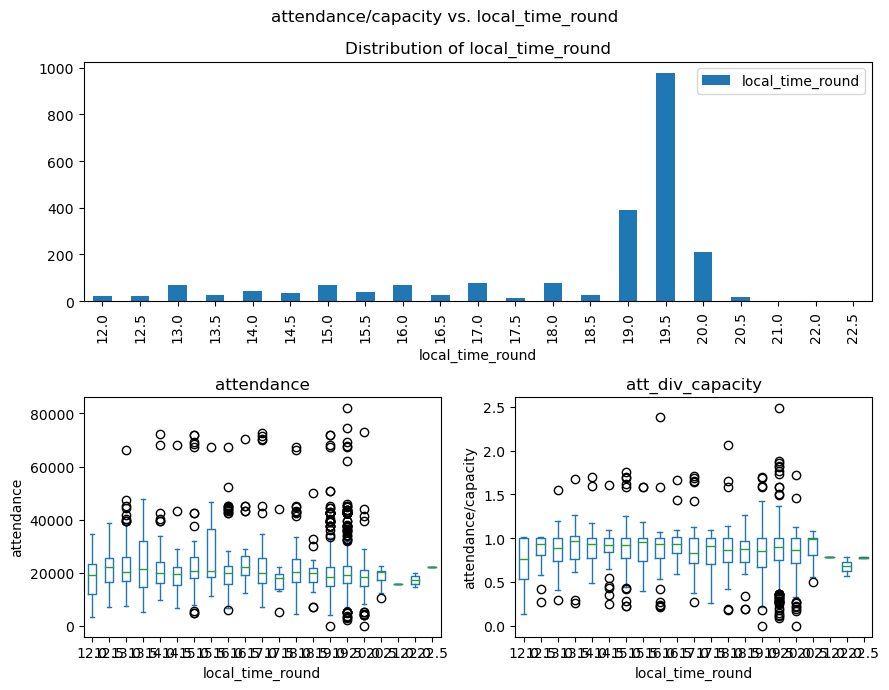

In [18]:
make_bar_box(mlsall_df, 'local_time_round', figsize=(9,7))

In [19]:
# Group by kick off time
mlsall_df.groupby('local_time_round').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude  \
local_time_round                                                          
12.0              18508.750000          0.725057   12.000000  40.707500   
12.5              22142.428571          0.843898   12.500000  39.488095   
13.0              23458.985915          0.853092   12.996479  41.096761   
13.5              23687.821429          0.900725   13.500000  40.979643   
14.0              23577.232558          0.905007   13.998062  39.624186   
14.5              20275.000000          0.870446   14.500000  37.918919   
15.0              24096.757143          0.905347   15.000000  39.048286   
15.5              26998.717949          0.918623   15.500000  38.340000   
16.0              22503.239437          0.878904   15.998826  38.840000   
16.5              26200.333333          0.951799   16.500000  38.466667   
17.0              23394.384615          0.865658   16.994658  38.632051   
17.5              18675.230769          0.841329   17.500000  37.693846   
18.0              22616.282051          0.860268   18.000000  38.652564   
18.5              20064.185185          0.809653   18.500000  39.564444   
19.0              20123.664103          0.813698   19.000641  40.409308   
19.5              20262.958035          0.861027   19.500000  38.391699   
20.0              18435.518868          0.819807   20.000786  36.926981   
20.5              18424.166667          0.892198   20.500000  33.301111   
21.0              15655.000000          0.782750   21.000000  38.870000   
22.0              17267.500000          0.677157   22.000000  28.540000   
22.5              22085.000000          0.778985   22.500000  43.630000   

                   longitude  real_home_team  temperature      rain      snow  \
local_time_round                                                                
12.0              -99.953333        0.958333    49.804167  0.191667  0.000000   
12.5             -108.310000        1.000000    51.471429  0.142857  0.000000   
13.0              -94.143099        0.971831    52.642254  0.143662  0.000000   
13.5             -100.031429        0.964286    45.621429  0.132143  0.005000   
14.0             -101.294884        1.000000    54.741860  0.025581  0.001628   
14.5              -95.589459        1.000000    57.329730  0.294595  0.000000   
15.0              -91.895571        1.000000    55.901429  0.182857  0.000000   
15.5              -85.632051        1.000000    61.543590  0.092308  0.000000   
16.0              -92.995070        1.000000    62.857746  0.057746  0.003944   
16.5              -99.596296        1.000000    55.748148  0.055556  0.000000   
17.0              -91.985000        1.000000    67.476923  0.178205  0.000897   
17.5              -92.087692        1.000000    65.669231  0.253846  0.000000   
18.0              -90.963718        0.987179    70.100000  0.191026  0.000000   
18.5             -100.783333        1.000000    75.403704  0.003704  0.000000   
19.0              -99.099949        0.997436    72.421795  0.181282  0.000000   
19.5              -92.099969        0.992835    73.512692  0.206448  0.002794   
20.0              -91.762311        0.990566    81.945755  0.376415  0.000000   
20.5              -93.997222        1.000000    80.977778  0.511111  0.000000   
21.0              -77.010000        1.000000    76.500000  0.300000  0.000000   
22.0              -81.390000        1.000000    84.900000  0.700000  0.000000   
22.5              -79.420000        0.000000    39.100000  0.400000  0.070000   

                  cloudcover  windspeed   windgust   rain_sum  snow_sum  \
local_time_round                                                          
12.0               43.916667  10.962500  22.770833   2.062500  0.000000   
12.5               55.142857   8.033333  17.852381   0.828571  0.000000   
13.0               53.309859   9.797183  21.987324   1.473239  0.006901   
13.5               52.571429   9.960714  22.382143   1.

The vast majority of matches started between 7 pm and 8 pm local time. However, there are a fair number of matches that started earlier than 7 pm and the attendance figures are not bad. Each kick off time from 1 pm to 5 pm had an average attendance at or above 85%, which is the average over the entire dataset.

The kick off times with below average attendance are mostly between 5:30 and 10:30 pm. Matches starting at noon also performed quite poorly, only achieving around getting 18,500 people (72.5%) on average.

The very late kick off times (9 pm or later) had particularly poor attendance, but there are two caveats to this. There are only 5 matches that started this late, so the sample size is small. Also, I expect that MLS did not originally intend for these matches to start so late. Four of the matches had rain and the fifth had snow. This indicates to me that there was a solid chance the matches were suspended for some amount of time (see the next cell to see these matches).

In [20]:
# Matches that started at 9 pm or later
mlsall_df[mlsall_df['local_time_round']>=21]

round  day        date  local_time  home_team  home_score  \
233   Regular Season  Wed  2018-07-25        21.0          8           0   
1563  Regular Season  Sat  2022-07-09        22.0         19           1   
1693  Regular Season  Wed  2022-08-31        22.0         19           3   
1830  Regular Season  Sun  2023-03-12        22.5         11           4   
1858  Regular Season  Sat  2023-03-25        22.5         11           2   

      away_score  away_team  attendance           stadium  ...  cloudcover  \
233            1         18       15655        Audi Field  ...        52.0   
1563           0         13       20052  Exploria Stadium  ...        47.0   
1693           2         24       14483  Exploria Stadium  ...        69.0   
1830           0         16       22007         BMO Field  ...       100.0   
1858           1          7       22163         BMO Field  ...       100.0   

      windspeed  windgust  rain_sum  snow_sum  date_year  date_month  \
233         9.0      19.8      12.6      0.00       2018           7   
1563       10.9      23.0       0.2      0.00       2022           7   
1693        7.2      14.0       2.5      0.00       2022           8   
1830       14.1      20.5       0.0      0.49       2023           3   
1858       28.2      54.0      13.3      1.19       2023           3   

      date_day  home_opener  local_time_round  
233         25            0              21.0  
1563         9            0              22.0  
1693        31            0              22.0  
1830        12            0              22.5  
1858        25            0              22.5  

[5 rows x 30 columns]

**Kick off time vs. day**

<Axes: title={'center': 'Kick off time vs. day'}, xlabel='day', ylabel='local_time'>

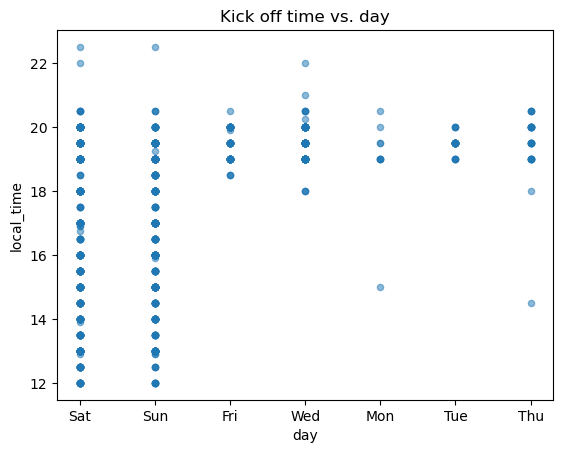

In [21]:
# Plot of kick off times vs. day
mlsall_df.plot.scatter(x='day',
                       y='local_time',
                       title='Kick off time vs. day',
                       alpha=0.5)

Early kick offs (between 12 and 17, or noon to 5 pm), basically only happened on weekends. Only two matches were played before 6 pm on weekdays.

**Did adjustment to kick off times in 2023 help attendance?**

Prior to 2023, MLS used to have a lot of variability in kick off times, but this past season, they tried to standardize it more by having most matches start at 7:30 pm local time. This can be seen in the distribution of matches played on Sundays, in particular, which I show below.

Text(0.5, 1.0, 'Sunday kick of times in 2023')

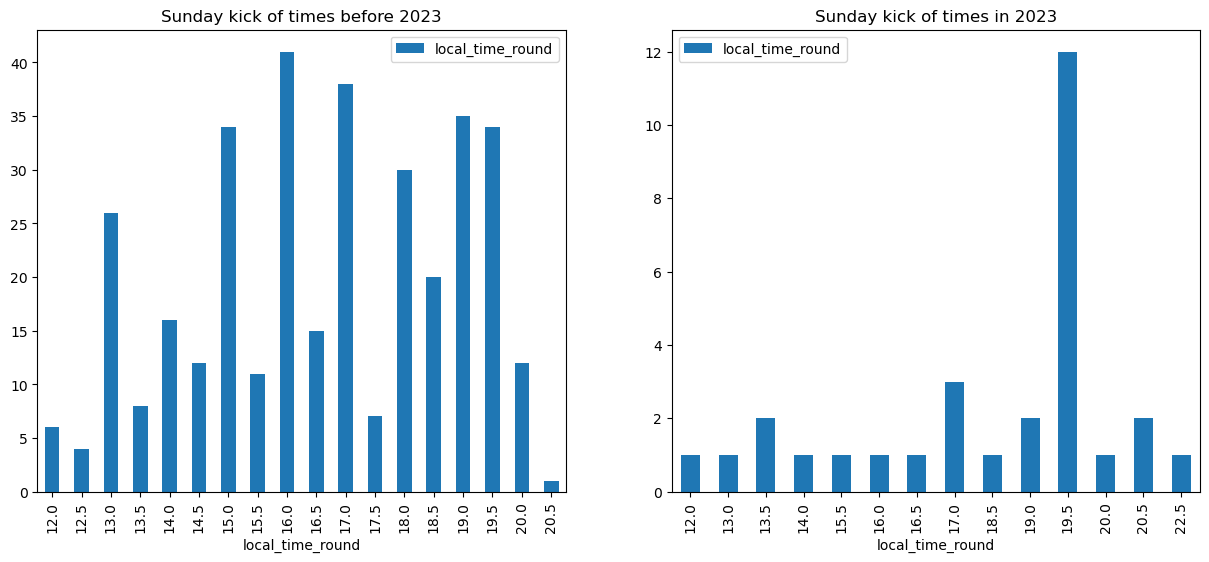

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

mlsall_df[(mlsall_df['date_year']!=2023)&\
          (mlsall_df['day']=='Sun')&\
          (mlsall_df['playoff']==0)].\
groupby('local_time_round').agg({'local_time_round':'count'}).plot.bar(ax=ax[0])

ax[0].set_title('Sunday kick of times before 2023')

mlsall_df[(mlsall_df['date_year']==2023)&\
          (mlsall_df['day']=='Sun')&\
          (mlsall_df['playoff']==0)].\
groupby('local_time_round').agg({'local_time_round':'count'}).plot.bar(ax=ax[1])

ax[1].set_title('Sunday kick of times in 2023')

Between 2018 and 2022 (excluding 2020), Sunday kick off times were all over the place. The most common kick off time was 4 pm.

In 2023, 40% of Sunday matches started at 7:30 pm, which was by far the most common kick off time. Did this improve attendance?

In [23]:
# Sunday 2018,2019,2021,2022 attendance
mlsall_df.loc[(mlsall_df['date_year']!=2023)&(mlsall_df['day']=='Sun'),\
              ['attendance','att_div_capacity','local_time']].describe()

attendance  att_div_capacity  local_time
count    373.000000        373.000000  373.000000
mean   23244.954424          0.902015   16.603217
std    11544.229492          0.254090    2.208159
min     3219.000000          0.128760   12.000000
25%    17704.000000          0.795411   15.000000
50%    20738.000000          0.940867   16.500000
75%    25117.000000          1.003633   18.500000
max    72243.000000          2.386024   20.500000

In [24]:
# Sunday 2023 attendance
mlsall_df.loc[(mlsall_df['date_year']==2023)&(mlsall_df['day']=='Sun'),\
              ['attendance','att_div_capacity','local_time']].describe()

attendance  att_div_capacity  local_time
count     30.00000         30.000000   30.000000
mean   23006.60000          0.870052   17.966667
std     7701.90772          0.194867    2.619336
min     7417.00000          0.296680   12.000000
25%    18537.00000          0.762492   16.625000
50%    21372.50000          0.983598   19.500000
75%    26747.25000          1.005186   19.500000
max    43527.00000          1.046541   22.500000

The average attendance for Sunday matches between 2018 and 2022 was 23,245 (90.2%). In 2023, when the average kick off time was about an hour and 20 minutes later, the average was 23,006 (87.0%). The percentages would seem to indicate that the move to later kick offs made attendance a little worse.

**Attendance by Year**

This dataset contains 5 MLS seasons: 2018, 2019, 2021, 2022, and 2023. The 2020 MLS season is not being used for this analysis because almost the entire season was played without fans in attendance due to the COVID-19 pandemic.

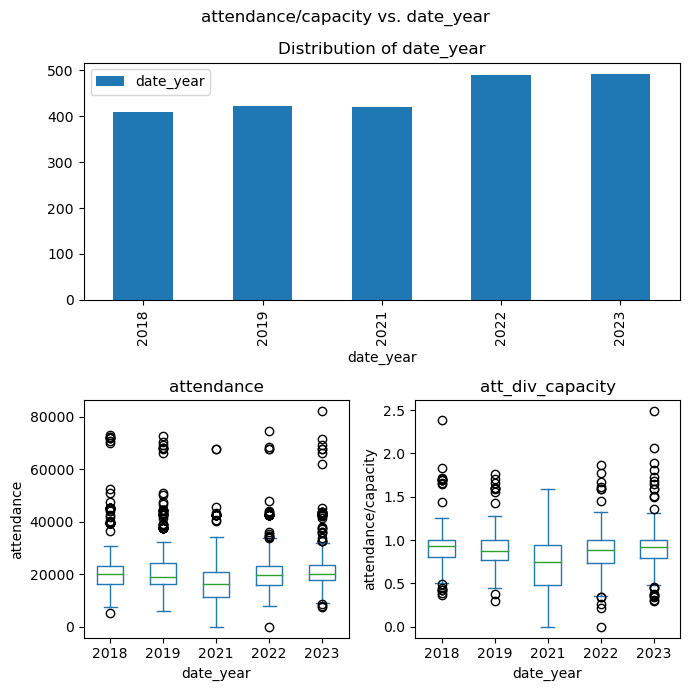

In [25]:
make_bar_box(mlsall_df, 'date_year')

In [26]:
# Group by year
mlsall_df.groupby('date_year').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude  longitude  \
date_year                                                                     
2018       22174.053922          0.910684   17.938930  39.580637 -94.942990   
2019       21722.232779          0.877872   18.045131  39.589406 -94.701876   
2021       16846.233890          0.707067   18.356205  38.039475 -94.076181   
2022       20977.822086          0.860713   18.001534  38.381329 -93.384110   
2023       22136.000000          0.895493   19.213415  38.508394 -93.067398   

           real_home_team  temperature      rain      snow  cloudcover  \
date_year                                                                
2018             1.000000    67.617402  0.194118  0.002230   44.213235   
2019             0.995249    69.773397  0.235867  0.000831   47.800475   
2021             0.980907    72.595465  0.220525  0.000000   43.840095   
2022             0.993865    70.914724  0.143967  0.001861   43.100204   
2023             0.991870    70.796748  0.224187  0.002561   43.619919   

           windspeed   windgust  rain_sum  snow_sum   playoff  same_conf  \
date_year                                                                  
2018       11.460784  27.260049  1.912990  0.018873  0.041667   0.674020   
2019       11.411164  27.914252  2.240618  0.031093  0.030879   0.655582   
2021       10.732220  26.338663  2.330788  0.000167  0.031026   0.945107   
2022       11.741718  27.543763  1.393047  0.030061  0.026585   0.768916   
2023       11.644715  27.787195  2.183943  0.092907  0.000000   0.817073   

             rivals  home_opener  
date_year                         
2018       0.083333     0.056373  
2019       0.066508     0.057007  
2021       0.097852     0.040573  
2022       0.071575     0.057260  
2023       0.087398     0.058943

The best attendance numbers, both in terms of percentage and raw value, was 2018 when the average attendance was 22,174 (91%).

The worst year for attendance was 2021 when the average attendance was 16,846 (70.7%). A big part of this was the pandemic. Even though I removed matches that had no fans, the dataset does include some matches where the attendance was artifically reduced for safety reasons and I think it took people a while to get comfortable to return to large gatherings.

**Attendance for Conference vs. Non-Conference Matches**

MLS is split into a Western and an Eastern Conference. Teams play most of their matches against teams from the same conference. The 'same_conf' column says whether the teams in a given match are from the same conference. Let's see if their is a difference in attendance between conference and non-conference matches. I will only look at regular season matches.

In [27]:
# Conference matches
mlsall_df[(mlsall_df['same_conf']==1)&\
          (mlsall_df['playoff']==0)][['attendance','att_div_capacity']].mean()

attendance          20525.866707
att_div_capacity        0.842100
dtype: float64

In [28]:
# Non-conferences matches
mlsall_df[(mlsall_df['same_conf']==0)&\
          (mlsall_df['playoff']==0)][['attendance','att_div_capacity']].mean()

attendance          21119.736000
att_div_capacity        0.868322
dtype: float64

Non-conference matches had an average attendance of 21,120 (86.8%) compared to 20,526 (84.2%) for conference matches. This might seem to indicate that non-conference matches are better attended, if only slightly. However, I think something else is going on. In 2021, the season in which attendance was low because of the pandemic, 94.5% of matches were conference matches. In other seasons, that value ranges from 67% to 81%. I think this is biasing the attendance of conference matches to look lower than it would otherwise. Let's look at the numbers without 2021 included.

In [29]:
# Conference matches (excluding 2021)
mlsall_df[(mlsall_df['same_conf']==1)&\
          (mlsall_df['playoff']==0)&\
          (mlsall_df['date_year']!=2021)][['attendance','att_div_capacity']].mean()

attendance          21697.052754
att_div_capacity        0.885558
dtype: float64

In [30]:
# Non-conference matches (excluding 2021)
mlsall_df[(mlsall_df['same_conf']==0)&\
          (mlsall_df['playoff']==0)&\
          (mlsall_df['date_year']!=2021)][['attendance','att_div_capacity']].mean()

attendance          21283.391213
att_div_capacity        0.875153
dtype: float64

If 2021 is removed, then conference games are slightly better attended. The difference between the two values is quite small, indicating that there likely isn't a significant effect on attendance.

**Does attendance improve for rivalry matches?**

One might expect attendance to be higher when rivals play one another. Let's see if that is true.

In [31]:
# Rivals playing
mlsall_df[(mlsall_df['rivals']==1)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time    latitude   longitude  \
count    176.000000        176.000000  176.000000  176.000000  176.000000   
mean   22485.062500          0.869651   18.385890   39.261705 -101.197727   
std     9794.993923          0.194465    2.188235    6.212876   18.972539   
min     5000.000000          0.266407   12.000000   26.190000 -123.110000   
25%    16658.000000          0.770218   18.500000   33.860000 -122.010000   
50%    20738.000000          0.909840   19.500000   39.970000  -97.720000   
75%    25389.250000          1.000000   19.500000   45.520000  -81.390000   
max    82110.000000          1.270250   22.000000   49.280000  -73.550000   

       real_home_team  temperature        rain   snow  cloudcover   windspeed  \
count           176.0   176.000000  176.000000  176.0  176.000000  176.000000   
mean              1.0    73.046023    0.116477    0.0   41.397727   10.815341   
std               0.0    15.685600    0.506654    0.0   35.874556    5.639042   
min               1.0    13.700000    0.000000    0.0    0.000000    1.100000   
25%               1.0    64.600000    0.000000    0.0    8.000000    7.100000   
50%               1.0    74.550000    0.000000    0.0   30.000000   10.150000   
75%               1.0    84.125000    0.000000    0.0   79.250000   13.525000   
max               1.0   104.900000    5.200000    0.0  100.000000   28.100000   

         windgust    rain_sum    snow_sum  playoff   same_conf  rivals  \
count  176.000000  176.000000  176.000000    176.0  176.000000   176.0   
mean    25.672159    1.627273    0.022273      0.0    0.982955     1.0   
std      9.751482    4.953619    0.216640      0.0    0.129810     0.0   
min      6.800000    0.000000    0.000000      0.0    0.000000     1.0   
25%     19.700000    0.000000    0.000000      0.0    1.000000     1.0   
50%     24.300000    0.000000    0.000000      0.0    1.000000     1.0   
75%     31.075000    0.100000    0.000000      0.0    1.000000     1.0   
max     61.600000   30.000000    2.590000      0.0    1.000000     1.0   

       home_opener  
count   176.000000  
mean      0.022727  
std       0.149458  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [32]:
# Not rivals playing
mlsall_df[(mlsall_df['rivals']==0)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity   local_time     latitude    longitude  \
count   1997.000000       1997.000000  1997.000000  1997.000000  1997.000000   
mean   20501.888833          0.846237    18.360875    38.731387   -93.304256   
std     9084.442176          0.231042     2.040484     5.525733    17.247786   
min       16.000000          0.000627    12.000000    26.190000  -123.110000   
25%    15621.000000          0.726293    18.000000    33.860000  -104.890000   
50%    19096.000000          0.879176    19.500000    39.810000   -87.620000   
75%    22423.000000          1.000000    19.500000    42.090000   -79.420000   
max    74479.000000          2.489441    22.500000    49.280000   -71.260000   

       real_home_team  temperature         rain         snow   cloudcover  \
count     1997.000000  1997.000000  1997.000000  1997.000000  1997.000000   
mean         0.991988    70.623435     0.209765     0.001718    44.793691   
std          0.089173    15.602899     0.823691     0.027399    36.128369   
min          0.000000    18.400000     0.000000     0.000000     0.000000   
25%          1.000000    59.900000     0.000000     0.000000    10.000000   
50%          1.000000    74.200000     0.000000     0.000000    38.000000   
75%          1.000000    82.800000     0.000000     0.000000    80.000000   
max          1.000000   106.300000    11.400000     0.910000   100.000000   

         windspeed     windgust     rain_sum     snow_sum  playoff  \
count  1997.000000  1997.000000  1997.000000  1997.000000   1997.0   
mean     11.483325    27.601853     2.036555     0.038698      0.0   
std       6.275254    11.151406     5.306524     0.543650      0.0   
min       0.000000     4.000000     0.000000     0.000000      0.0   
25%       6.800000    20.200000     0.000000     0.000000      0.0   
50%      10.500000    25.600000     0.000000     0.000000      0.0   
75%      14.800000    33.100000     1.100000     0.000000      0.0   
max      44.700000    88.600000    57.400000    19.040000      0.0   

         same_conf  rivals  home_opener  
count  1997.000000  1997.0  1997.000000  
mean      0.751127     0.0     0.058588  
std       0.432469     0.0     0.234911  
min       0.000000     0.0     0.000000  
25%       1.000000     0.0     0.000000  
50%       1.000000     0.0     0.000000  
75%       1.000000     0.0     0.000000  
max       1.000000     0.0     1.000000

The attendance for rivalry games is 22,485 (87.0%). For non-rivalry games, it is 20,502 (84.6%). This indicates that rivalry games are better attended.

**Attendance by Team**

Below, I look at the distribution of attendance for each team. For the sake of labeling, I create a dictionary that changes the team ID number into the team name.

In [33]:
team_names = {0: 'Atlanta United',
              1: 'Austin FC',
              2: 'Charlotte FC',
              3: 'Chicago Fire',
              4: 'FC Cincinnati',
              5: 'Colorado Rapids',
              6: 'Columbus Crew',
              7: 'FC Dallas',
              8: 'D.C. United',
              9: 'Houston Dynamo',
              10: 'Los Angeles Galaxy',
              11: 'Los Angeles FC',
              12: 'Minnesota United',
              13: 'Inter Miami',
              14: 'CF Montreal',
              15: 'Nashville SC',
              16: 'New England Revolution',
              17: 'New York City FC',
              18: 'New York Red Bulls',
              19: 'Orlando City',
              20: 'Philadelphia Union',
              21: 'Portland Timbers',
              22: 'Real Salt Lake',
              23: 'San Jose Earthquakes',
              24: 'Seattle Sounders',
              25: 'Sporting Kansas City',
              26: 'St. Louis FC',
              27: 'Toronto FC',
              28: 'Vancouver Whitecaps'}

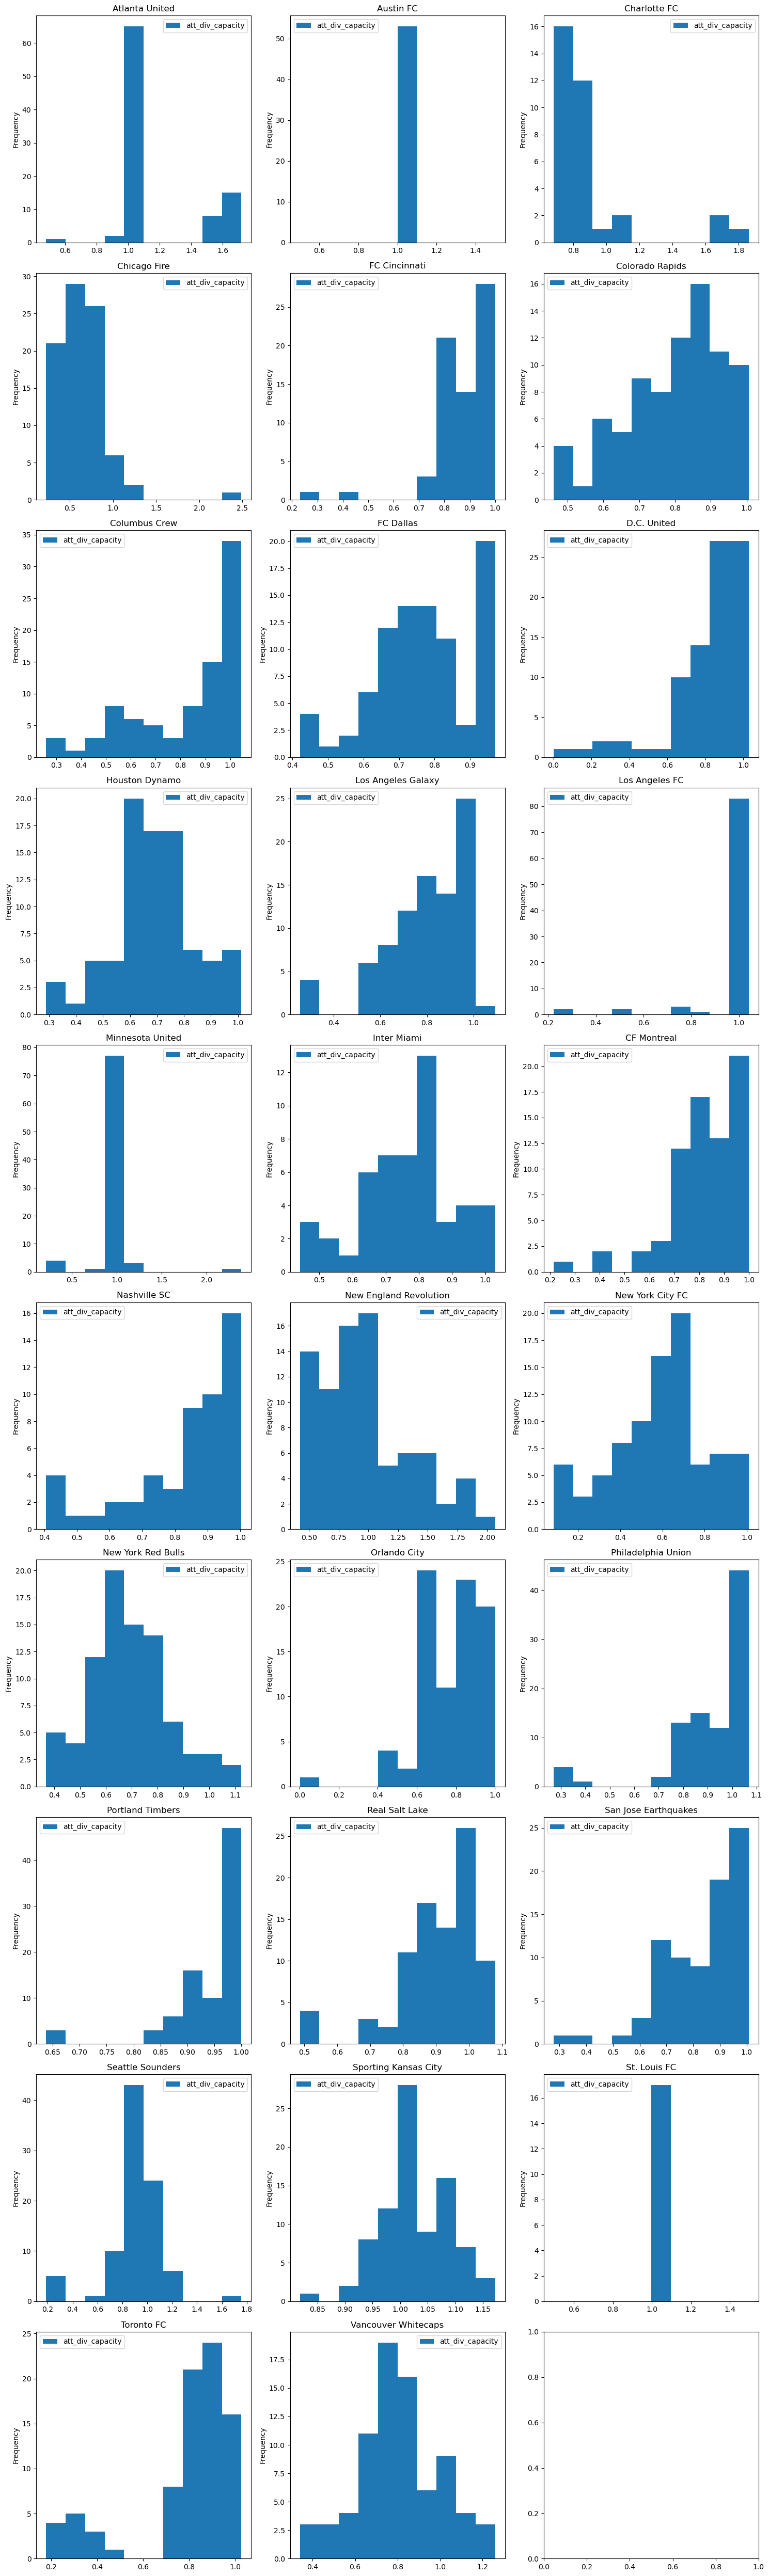

In [34]:
# Histograms of attendance/capacity for each home team
attendance_histograms(mlsall_df, 'home_team', label_dict=team_names)

First, there are a couple teams who have sold out every home match: Austin FC and St. Louis FC. It might be worth excluding their home matches from the analysis because there are no trends to be found.

The following teams have matches at above 100% capacity: Atlanta United, Charlotte FC, Chicago Fire, Minnesota United, New England Revolution, New York Red Bulls, Seattle Sounders, Sporting Kansas City, and Vancouver Whitecaps.

Besides the two teams that always sell out their home matches, there are some teams that nearly sell out each match: Atlanta United, Los Angeles FC, Minnesota United, and Portland Timbers.

In [35]:
# Group by home team
mlsall_df.groupby('home_team').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude   longitude  \
home_team                                                                      
0          49617.934066          1.167481   17.444139  33.750000  -84.400000   
1          20738.000000          1.000000   19.136792  30.390000  -97.720000   
2          35916.382353          0.897910   18.279412  33.230000  -81.020000   
3          14370.211765          0.633156   17.764706  41.817647  -87.700471   
4          24091.191176          0.875644   18.845588  39.115000  -84.520000   
5          14413.036585          0.798020   18.524390  39.810000 -104.890000   
6          16643.406977          0.832355   18.482558  39.988140  -83.006395   
7          15673.022989          0.764538   18.623563  33.150000  -96.840000   
8          16262.139535          0.819084   18.984496  38.874535  -77.007674   
9          15251.047059          0.692003   18.769608  29.750000  -95.350000   
10         22056.604651          0.794221   18.063953  33.865233 -118.259186   
11         21513.098901          0.968377   18.114469  34.325495 -116.998681   
12         19717.139535          0.988594   17.854651  44.955930  -93.171860   
13         14629.860000          0.768126   18.800000  26.190000  -80.160000   
14         17003.577465          0.824471   18.218310  45.560000  -73.550000   
15         24992.019231          0.833067   18.346154  36.130000  -86.770000   
16         19690.341463          0.984517   18.780488  42.090000  -71.260000   
17         18355.613636          0.597915   17.567235  40.808977  -73.950000   
18         17266.023810          0.690641   18.350198  40.740000  -74.150000   
19         19780.247059          0.775696   18.688235  28.540000  -81.390000   
20         16825.604396          0.909492   18.494505  39.830000  -75.380000   
21         23022.141176          0.949036   18.022549  45.520000 -122.690000   
22         18287.436782          0.904736   19.051724  40.580000 -111.890000   
23         17130.271605          0.837747   18.450617  37.355556 -121.926173   
24         34872.666667          0.904692   16.893519  47.600000 -122.330000   
25         18930.581395          1.025103   18.563953  39.120000  -94.820000   
26         22423.000000          0.996578   19.205882  38.630000  -90.210000   
27         22875.146341          0.785485   18.646341  43.630000  -79.420000   
28         17854.794872          0.807835   18.096154  49.168462 -122.966154   

           real_home_team  temperature      rain      snow  cloudcover  \
home_team                                                                
0                1.000000    72.389011  0.260440  0.000000   53.406593   
1                1.000000    83.379245  0.083019  0.000000   40.716981   
2                1.000000    77.711765  0.588235  0.000000   52.323529   
3                1.000000    64.404706  0.150588  0.000000   44.152941   
4                1.000000    73.563235  0.095588  0.001029   44.058824   
5                1.000000    68.515854  0.020732  0.005122   29.158537   
6                1.000000    68.239535  0.097674  0.000000   50.813953   
7                1.000000    78.032184  0.441379  0.000000   37.252874   
8                1.000000    73.845349  0.186047  0.004884   46.441860   
9                1.000000    81.374118  0.478824  0.000000   47.223529   
10               0.988372    72.309302  0.031395  0.000000   29.883721   
11               0.956044    72.149451  0.020879  0.003077   27.670330   
12               1.000000    64.967442  0.068605  0.004070   40.639535   
13               1.000000    84.118000  0.634000  0.000000   50.180000   
14               1.000000    66.277465  0.181690  0.000000   50.380282   
15               1.000000    75.359615  0.232692  0.000000   47.596154   
16               1.000000    65.656098  0.203659  0.011098   55.341463   
17               0.863636    68.494318  0.127273  0.000000   46.079545   
18               1.000000    70.409524  0.152381  0.

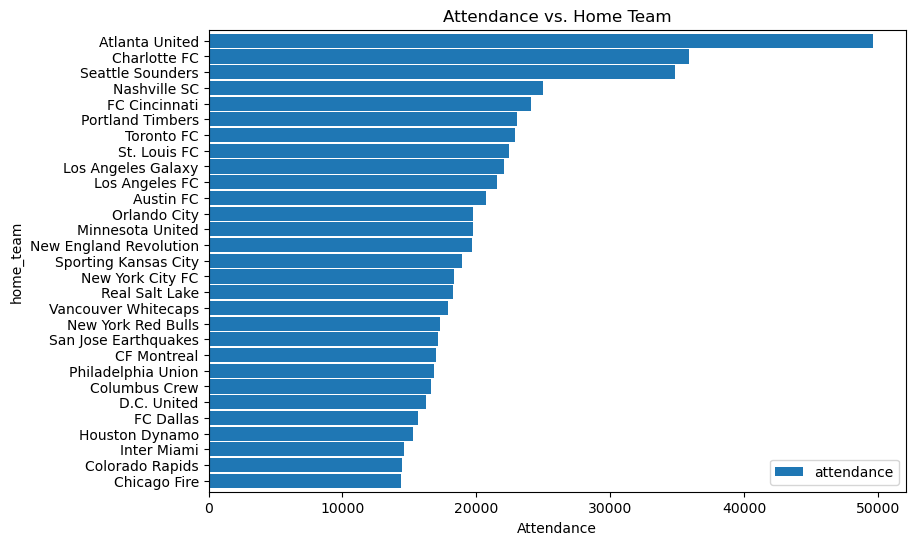

In [36]:
# Plot of attendance vs. home team
ax = mlsall_df.groupby('home_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='attendance').\
plot.barh(y='attendance',
          title='Attendance vs. Home Team',
          xlabel='Attendance',
          width=0.9,
          figsize=(9,6))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('home_team').\
                                                      agg({'attendance':'mean'})['attendance']).values]);

Atlanta United, Seattle Sounders, and Charlotte FC lead the way in terms of overall attendance. These teams all share a large stadium with an NFL team, allowing these teams to have average attendance values higher than the stadium capacity of most other teams.

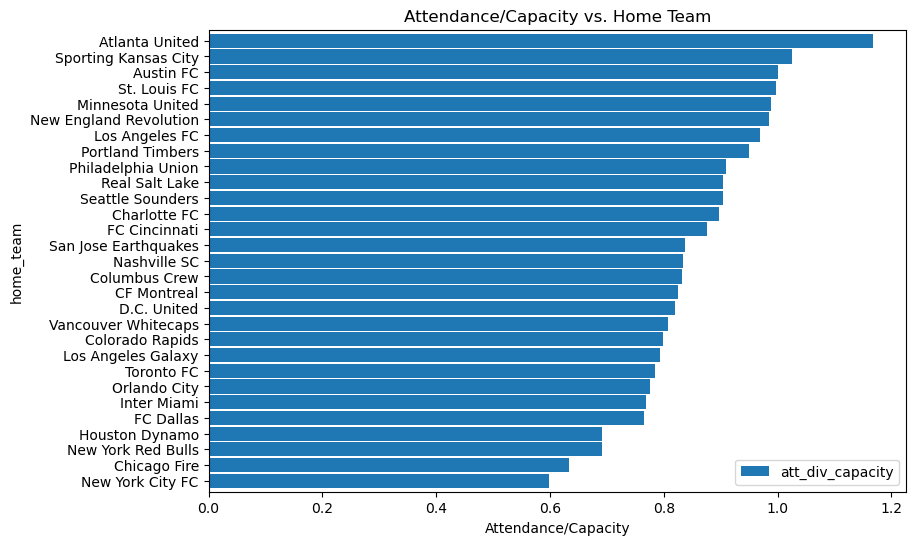

In [37]:
# Plot of attendance/capacity vs. home team
ax = mlsall_df.groupby('home_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='att_div_capacity').\
plot.barh(y='att_div_capacity',
          title='Attendance/Capacity vs. Home Team',
          xlabel='Attendance/Capacity',
          width=0.9,
          figsize=(9,6))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('home_team').\
                                                      agg({'att_div_capacity':'mean'})['att_div_capacity']).values]);

In terms of percentage attendance, Atlanta United still leads the way. Their average attendance is higher than the artificially reduced capacity they usually use thanks to the matches where they do use the entire capacity.

The teams with the worst attendance are the Chicago Fire and New York City FC. Both of these teams are in the process of building new stadiums and have had to use other stadiums in the meantime, which has not helped with attendance.

**Attendance vs. Away Team**

It is possible that certain away teams drive attendance more than others. This could be because they have a star player that people want to see (think Lionel Messi in 2023), or that people just want to see matches against stronger opponents.

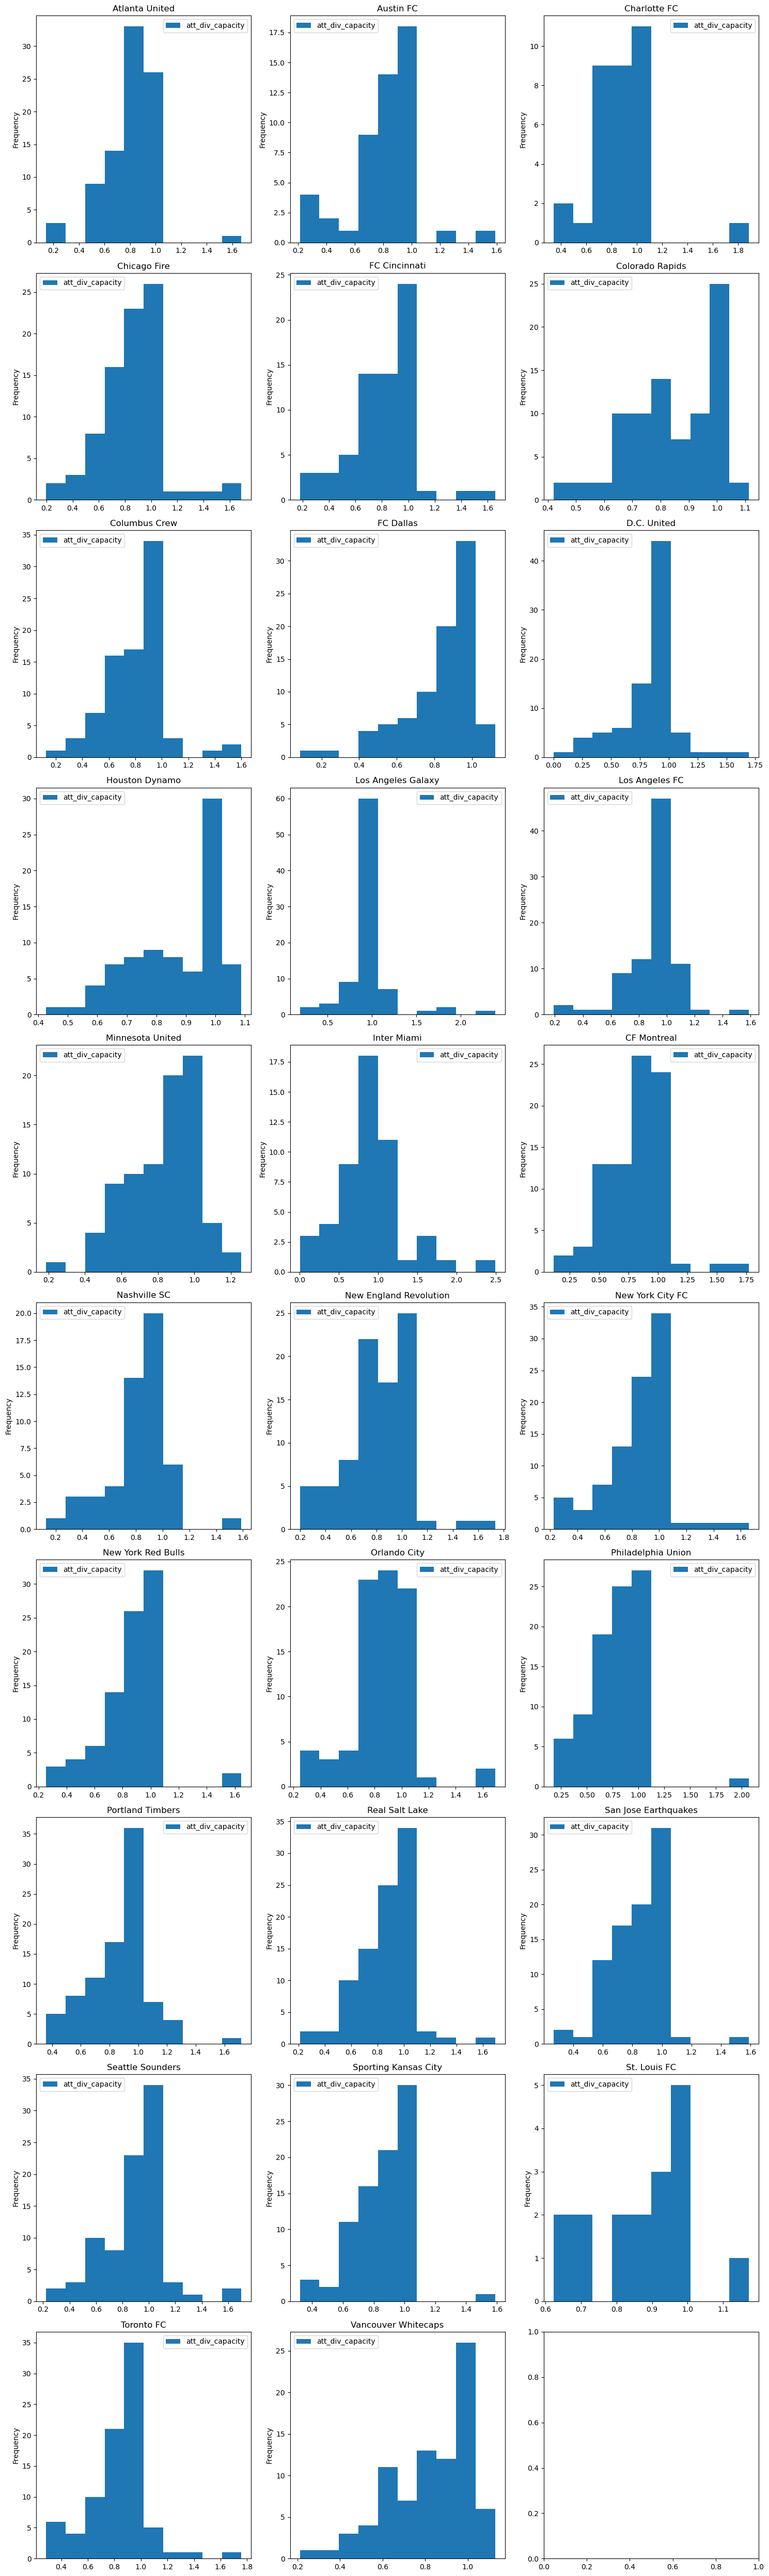

In [38]:
# Histograms of attendance/capacity vs. away team
attendance_histograms(mlsall_df, 'away_team', label_dict=team_names)

In [39]:
# Group by away team
mlsall_df.groupby('away_team').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude   longitude  \
away_team                                                                      
0          19634.779070          0.813420   17.975775  38.980581  -86.190349   
1          19212.340000          0.821436   18.370000  38.762400 -103.591000   
2          21520.636364          0.871524   19.196970  38.665455  -85.441818   
3          21309.867470          0.851394   18.445783  38.718434  -85.968313   
4          20562.484848          0.821742   18.772727  38.603939  -84.932424   
5          19850.035714          0.844569   18.479167  38.751548 -101.210238   
6          20776.869048          0.825024   18.392857  38.518571  -85.830476   
7          19645.211765          0.838161   18.445098  39.093176 -102.007059   
8          21419.084337          0.845700   18.559237  38.754940  -86.046145   
9          19656.654321          0.869849   18.759259  39.364074 -101.500988   
10         24338.682353          0.981295   18.111765  39.173294 -101.376235   
11         22611.423529          0.916365   17.694118  38.804235 -102.488471   
12         19032.964286          0.828991   18.641865  38.805238 -102.406905   
13         23538.588235          0.894030   18.549020  38.350000  -84.101765   
14         20484.821429          0.812810   18.142857  38.073571  -86.120476   
15         20299.384615          0.824637   18.346154  37.951154  -89.791346   
16         20852.764706          0.816671   18.211765  38.730588  -86.132471   
17         21025.344444          0.857716   17.813889  38.914889  -86.811778   
18         21820.597701          0.862420   17.936782  38.535287  -86.364253   
19         21494.987952          0.851115   18.355422  39.497229  -86.332771   
20         20379.160920          0.785299   18.514368  38.588736  -86.831034   
21         21359.651685          0.878907   18.241573  38.704045 -100.482135   
22         20717.097826          0.871532   18.508152  39.300978 -102.522283   
23         20067.529412          0.843893   18.347059  39.160706 -101.902824   
24         20321.709302          0.890036   18.337209  38.606860 -102.762326   
25         20341.583333          0.852222   18.095238  39.185833 -102.578810   
26         20696.705882          0.883772   18.911765  38.560588 -103.321176   
27         21510.678571          0.843496   18.196429  38.343333  -86.667619   
28         19615.047619          0.828714   18.547619  38.662143 -101.926310   

           real_home_team  temperature      rain      snow  cloudcover  \
away_team                                                                
0                0.988372    69.732558  0.284884  0.000814   40.534884   
1                1.000000    72.574000  0.238000  0.000000   42.620000   
2                0.969697    70.333333  0.033333  0.000000   38.757576   
3                1.000000    72.807229  0.091566  0.005060   50.710843   
4                0.984848    71.422727  0.124242  0.000000   44.136364   
5                1.000000    70.897619  0.244048  0.000000   38.773810   
6                0.988095    71.378571  0.127381  0.002500   38.607143   
7                0.976471    70.694118  0.120000  0.000000   39.552941   
8                0.987952    71.072289  0.309639  0.000000   46.060241   
9                1.000000    72.337037  0.161728  0.000000   45.814815   
10               1.000000    71.164706  0.130588  0.000000   39.800000   
11               1.000000    69.720000  0.275294  0.000000   45.423529   
12               1.000000    70.165476  0.117857  0.000000   40.940476   
13               0.960784    72.043137  0.196078  0.002745   42.843137   
14               0.988095    70.085714  0.317857  0.011667   46.916667   
15               0.980769    70.044231  0.261538  0.000000   49.346154   
16               0.976471    70.688235  0.105882  0.001647   49.623529   
17               1.000000    68.894444  0.295556  0.000000   50.322222   
18               1.000000    69.279310  0.291954  0.

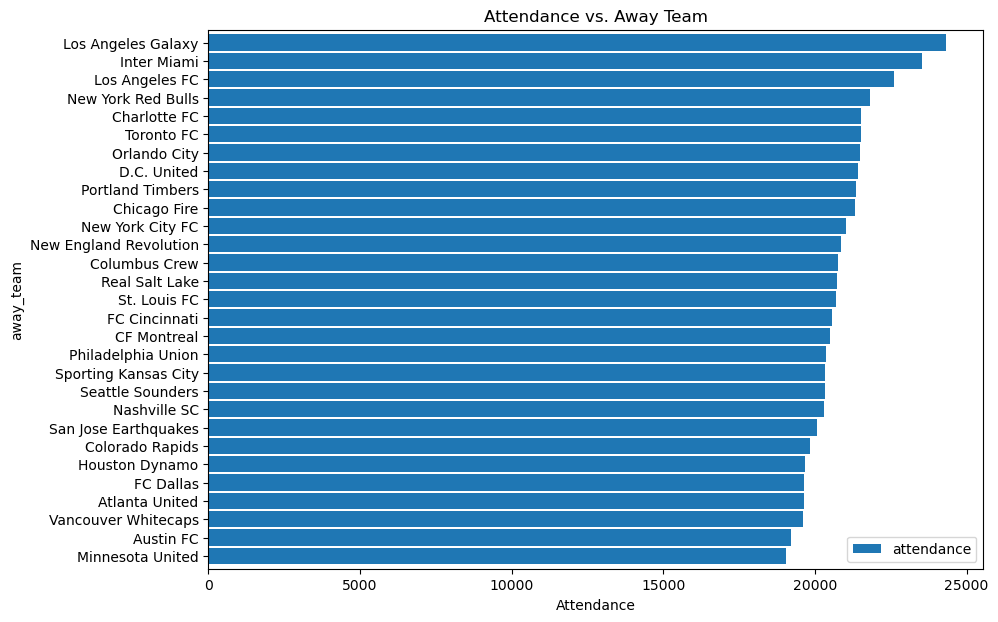

In [40]:
# Plot of attendance vs. away team
ax = mlsall_df.groupby('away_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='attendance').\
plot.barh(y='attendance',
          title='Attendance vs. Away Team',
          xlabel='Attendance',
          width=0.9,
          figsize=(10,7))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('away_team').\
                                                      agg({'attendance':'mean'})['attendance']).values]);

Los Angeles Galaxy, Inter Miami, and Los Angeles FC have the highest attendance values when they play on the road. Inter Miami may have gotten a bit of a boost late in 2023 because of Lionel Messi.

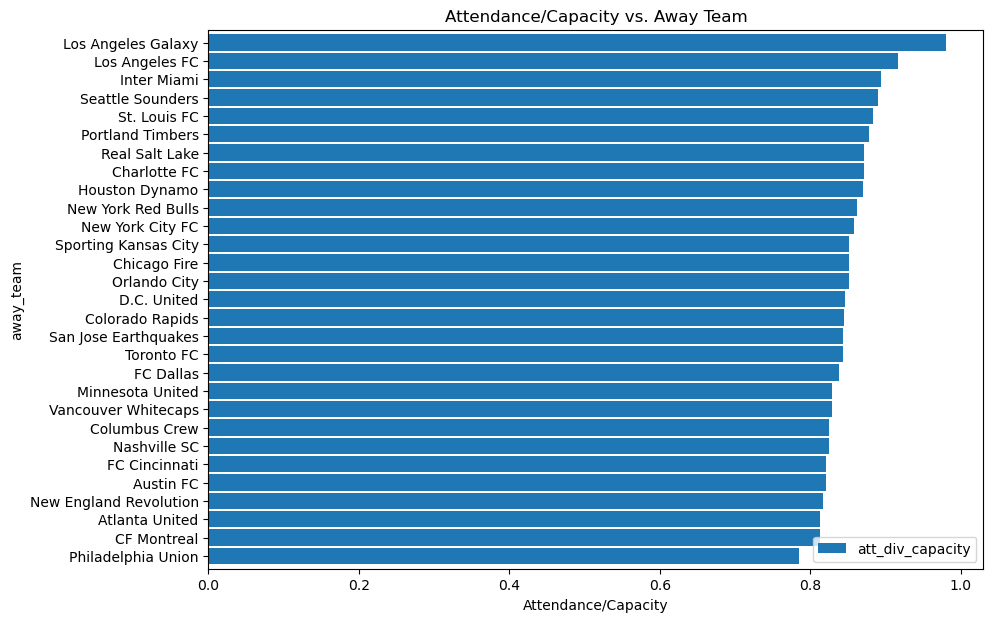

In [41]:
# Plot of attendance/capacity vs. away team
ax = mlsall_df.groupby('away_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='att_div_capacity').\
plot.barh(y='att_div_capacity',
          title='Attendance/Capacity vs. Away Team',
          xlabel='Attendance/Capacity',
          width=0.9,
          figsize=(10,7))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('away_team').\
                                                      agg({'att_div_capacity':'mean'})['att_div_capacity']).values]);

The two teams that get the highest attendance for their away matches are the Los Angeles Galaxy (98.1%) and Los Angeles FC (91.6%). No other teams average over 90%.

The team with the lowest attendance for its away matches is the Philadelphia Union (78.5%). Despite being a title contender the last few years, they are the only team that averages less than 80% attendance for away matches.

**Attendance vs. Weather**

Next, I will look at how each weather feature (temperature, rain, snow, cloud cover, windspeed, windgust speed) relate to attendance.

**Temperature**

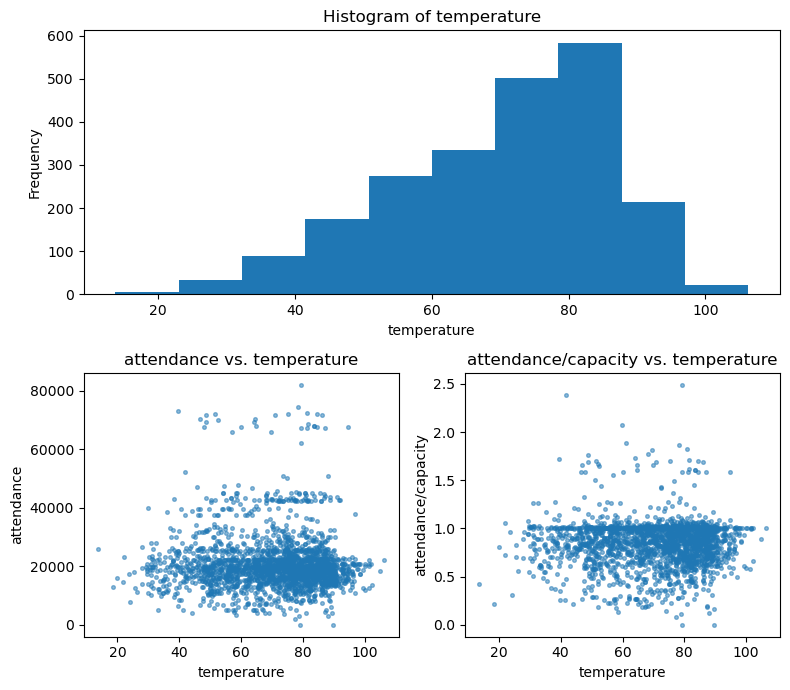

In [42]:
# Temperature
make_hist_scatter(mlsall_df, 'temperature', figsize=(8,7))

There is not a super clear trend between attendance and temperature.

I also want to look at how these scatter plot looks for each individual team, which I do below.

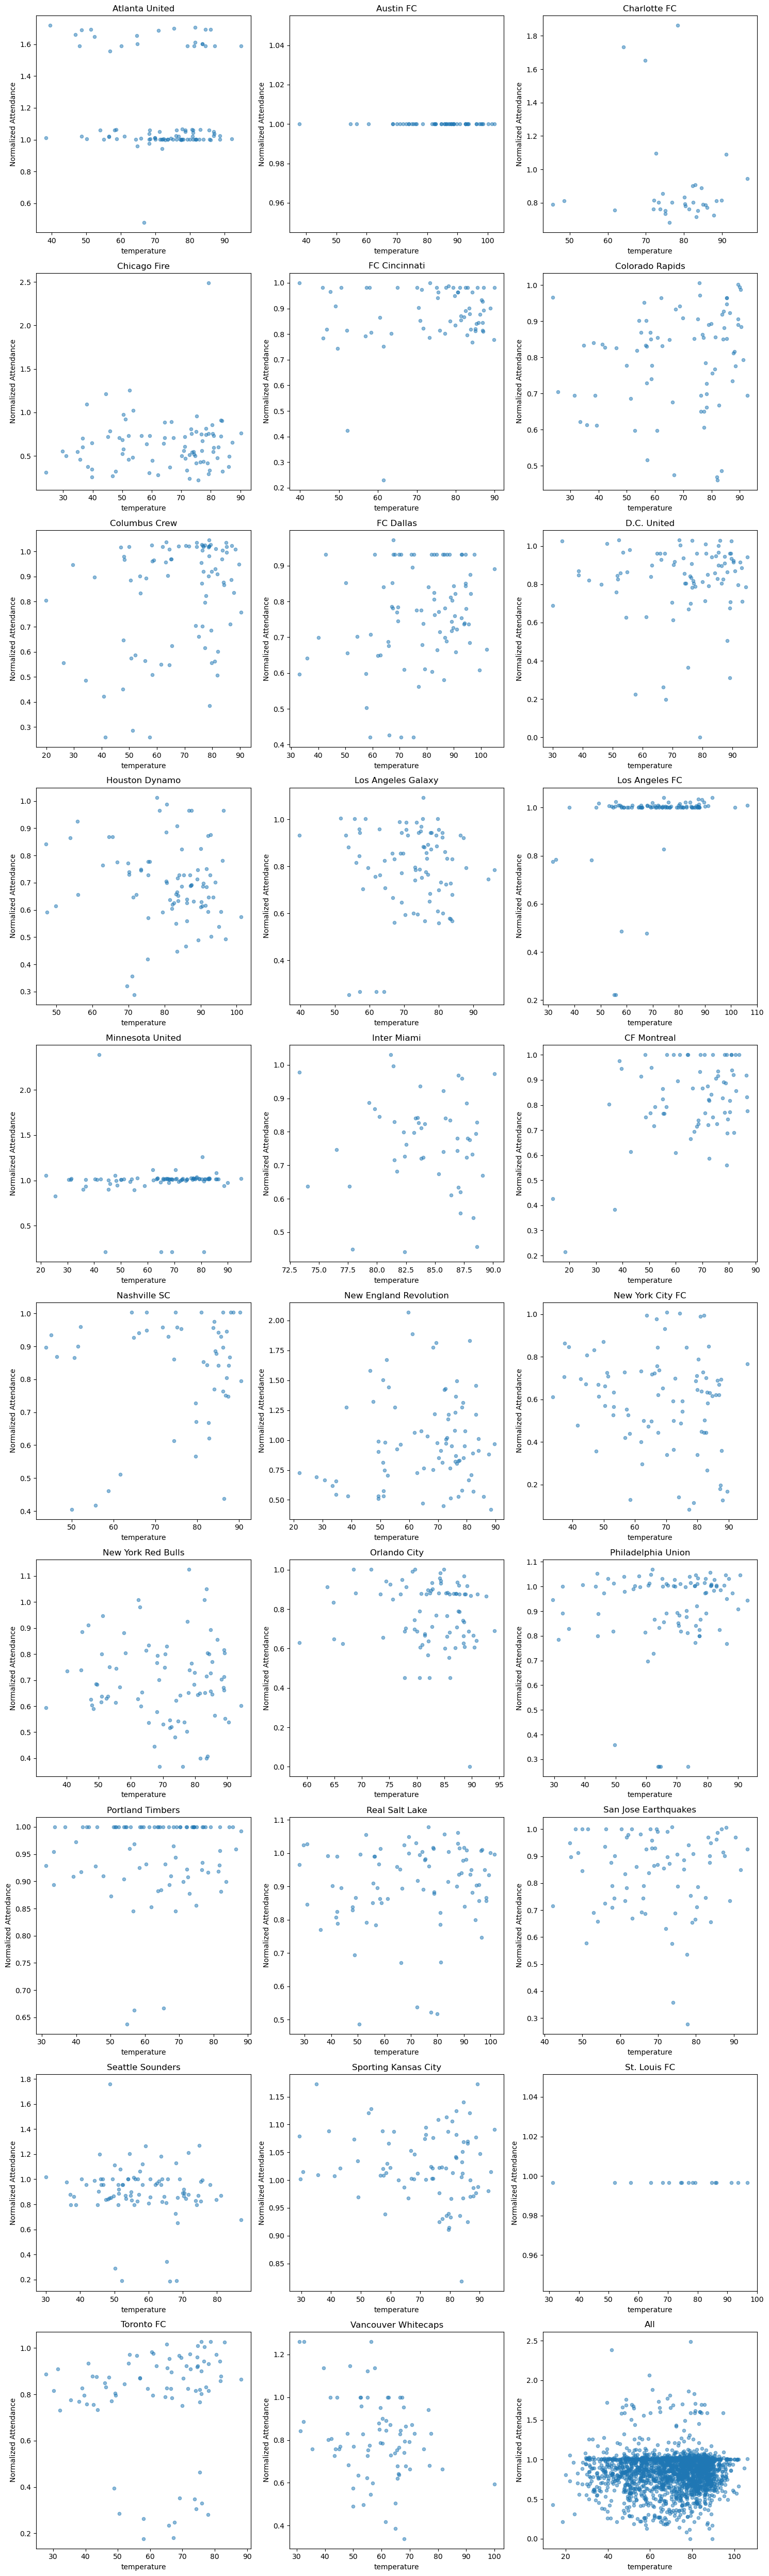

In [43]:
#Plot attendance vs. temperature
make_scatter_plots(mlsall_df, feature='temperature', split_by_team=True, label_dict=team_names)

While there is not a clear trend between temperature and attendance for any team, there is some evidence that extremely cold temperatures reduce attendance:

CF Montreal: Montreal had a few matches below 40 degrees that were very poorly attended.

New England Revolution: None of the 7 matches with a temperature below 40 degrees reach 80% attendance.

That said, several other teams have had cold matches that still had high attendance.

Below, I look at the stats for regular season matches with a temperature below 40 degrees. The average attendance was about 80% of the capacity, 5% lower than the overall average, indicating that cold temperatures might have a slight effect.

In [44]:
# Regular season matches with temperature <= 40
mlsall_df[(mlsall_df['temperature']<=40)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time    latitude   longitude  \
count    103.000000        103.000000  103.000000  103.000000  103.000000   
mean   18897.174757          0.799095   15.907767   42.167864  -92.699612   
std     7039.546989          0.210286    2.675916    3.703361   17.577162   
min     5128.000000          0.214199   12.000000   30.390000 -123.110000   
25%    13240.500000          0.662025   13.500000   39.830000 -104.890000   
50%    18632.000000          0.828270   15.000000   41.860000  -87.810000   
75%    23023.000000          0.968999   19.000000   44.950000  -77.160000   
max    43055.000000          1.258454   22.500000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      103.000000   103.000000  103.000000  103.000000  103.000000   
mean         0.980583    33.691262    0.083495    0.033301   59.737864   
std          0.138662     5.103000    0.311573    0.116740   40.414752   
min          0.000000    13.700000    0.000000    0.000000    0.000000   
25%          1.000000    31.000000    0.000000    0.000000   13.000000   
50%          1.000000    34.700000    0.000000    0.000000   77.000000   
75%          1.000000    37.950000    0.000000    0.000000  100.000000   
max          1.000000    39.900000    2.600000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff   same_conf  \
count  103.000000  103.000000  103.000000  103.000000    103.0  103.000000   
mean    14.049515   29.118447    1.737864    0.723107      0.0    0.640777   
std      7.935585   14.283542    4.522777    2.303802      0.0    0.482119   
min      1.100000    9.000000    0.000000    0.000000      0.0    0.000000   
25%      7.500000   17.600000    0.000000    0.000000      0.0    0.000000   
50%     12.400000   25.900000    0.000000    0.000000      0.0    1.000000   
75%     19.550000   40.000000    0.550000    0.385000      0.0    1.000000   
max     35.400000   69.100000   24.500000   19.040000      0.0    1.000000   

           rivals  home_opener  
count  103.000000   103.000000  
mean     0.067961     0.475728  
std      0.252910     0.501853  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.000000  
75%      0.000000     1.000000  
max      1.000000     1.000000

For the 103 matches that had temperature below 40 degrees at kick off, the average attendance was 18,897 (80%). This is below the average, indicating that very low temperatures do affect attendance.

**Rain**

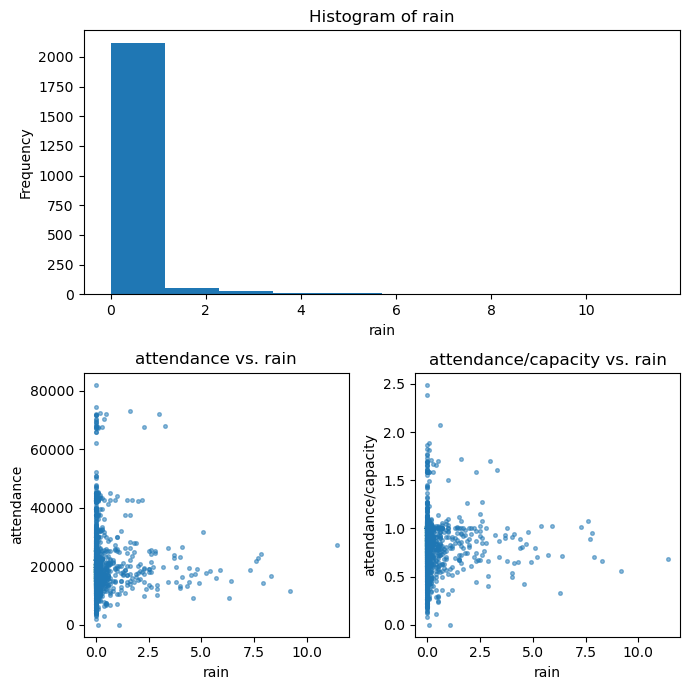

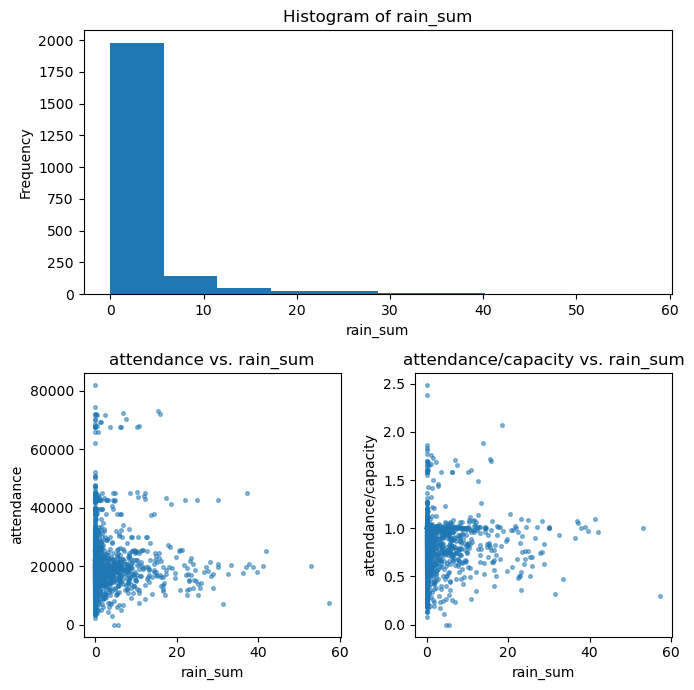

In [45]:
# Rain at kick off
make_hist_scatter(mlsall_df, 'rain')

# Rain prior to kick off
make_hist_scatter(mlsall_df, 'rain_sum')

Most matches did not have any rain at kick off, but there are 461 that did.

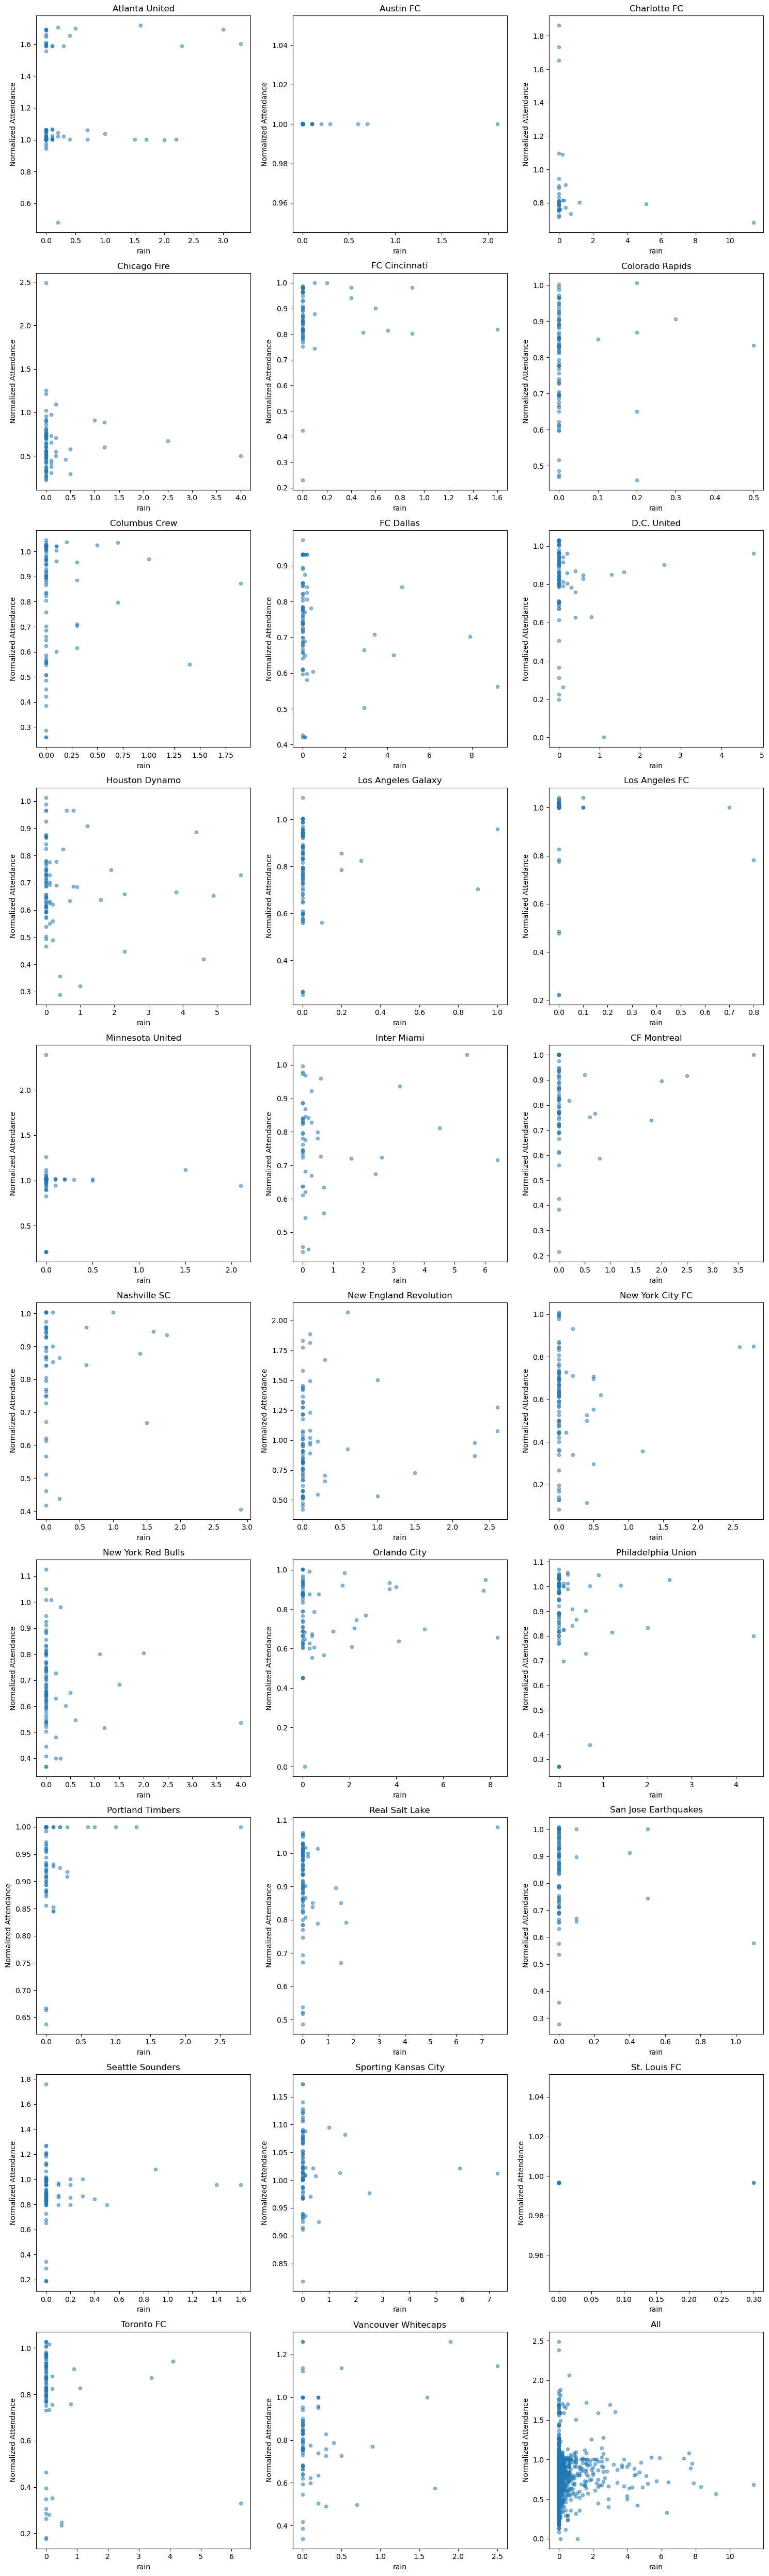

In [46]:
#Plot attendance vs. rain at kick off
make_scatter_plots(mlsall_df, feature='rain', split_by_team=True, label_dict=team_names)

In [47]:
# Regular season matches with non-zero rain at kick off
mlsall_df[(mlsall_df['rain']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time    latitude   longitude  \
count    463.000000        463.000000  463.000000  463.000000  463.000000   
mean   20841.779698          0.836921   18.598092   37.915054  -91.038618   
std    10546.856937          0.256007    1.910734    6.322014   16.351152   
min       16.000000          0.000627   12.000000   26.190000 -123.110000   
25%    15108.000000          0.687520   19.000000   33.150000  -96.840000   
50%    18725.000000          0.851996   19.500000   39.130000  -84.520000   
75%    22882.500000          1.000000   19.500000   41.975000  -79.420000   
max    72548.000000          2.067750   22.500000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      463.000000   463.000000  463.000000  463.000000  463.000000   
mean         0.991361    69.390065    0.949028    0.002268   75.235421   
std          0.092646    14.889055    1.523550    0.042526   27.304414   
min          0.000000    34.600000    0.100000    0.000000    1.000000   
25%          1.000000    58.200000    0.100000    0.000000   52.000000   
50%          1.000000    72.300000    0.300000    0.000000   87.000000   
75%          1.000000    82.100000    1.000000    0.000000  100.000000   
max          1.000000   100.100000   11.400000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff   same_conf  \
count  463.000000  463.000000  463.000000  463.000000    463.0  463.000000   
mean    12.297408   29.757235    5.626782    0.042484      0.0    0.753780   
std      6.783296   11.672693    7.740542    0.487270      0.0    0.431274   
min      0.800000    6.100000    0.000000    0.000000      0.0    0.000000   
25%      7.500000   21.600000    0.400000    0.000000      0.0    1.000000   
50%     11.300000   28.100000    2.600000    0.000000      0.0    1.000000   
75%     15.800000   34.600000    7.650000    0.000000      0.0    1.000000   
max     44.700000   88.600000   57.400000    9.520000      0.0    1.000000   

           rivals  home_opener  
count  463.000000   463.000000  
mean     0.053996     0.051836  
std      0.226254     0.221935  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.000000  
75%      0.000000     0.000000  
max      1.000000     1.000000

In [48]:
# Regular season matches with non-zero rain prior to kick off
mlsall_df[(mlsall_df['rain_sum']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time    latitude   longitude  \
count    873.000000        873.000000  873.000000  873.000000  873.000000   
mean   20765.518900          0.838986   18.535987   38.561856  -89.954021   
std     9929.557158          0.243007    1.891265    5.935955   15.763722   
min       16.000000          0.000627   12.000000   26.190000 -123.110000   
25%    15412.000000          0.708000   19.000000   33.750000  -96.840000   
50%    19027.000000          0.860930   19.500000   39.830000  -84.400000   
75%    22651.000000          1.000000   19.500000   42.090000  -77.010000   
max    72548.000000          2.067750   22.500000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      873.000000   873.000000  873.000000  873.000000  873.000000   
mean         0.993127    68.980069    0.456014    0.002325   65.057274   
std          0.082665    15.081946    1.161239    0.037484   32.546247   
min          0.000000    25.500000    0.000000    0.000000    0.000000   
25%          1.000000    57.700000    0.000000    0.000000   38.000000   
50%          1.000000    71.800000    0.000000    0.000000   69.000000   
75%          1.000000    81.700000    0.300000    0.000000  100.000000   
max          1.000000    96.800000   11.400000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff   same_conf  \
count  873.000000  873.000000  873.000000  873.000000    873.0  873.000000   
mean    12.699427   30.343184    4.986712    0.057171      0.0    0.759450   
std      6.991541   12.250023    7.383617    0.500690      0.0    0.427662   
min      0.000000    6.100000    0.100000    0.000000      0.0    0.000000   
25%      7.500000   21.600000    0.500000    0.000000      0.0    1.000000   
50%     11.600000   28.400000    1.900000    0.000000      0.0    1.000000   
75%     16.700000   36.000000    6.200000    0.000000      0.0    1.000000   
max     44.700000   88.600000   57.400000    9.520000      0.0    1.000000   

           rivals  home_opener  
count  873.000000   873.000000  
mean     0.058419     0.052692  
std      0.234669     0.223546  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.000000  
75%      0.000000     0.000000  
max      1.000000     1.000000

The average attendance for the 461 regular season matches that had rain at kick off was 83.4%.

For the 868 regular season matches that were preceded by rain, the average attendance was 83.8%.

These are both a little smaller than the 85% average for the entire dataset.

**Snow**

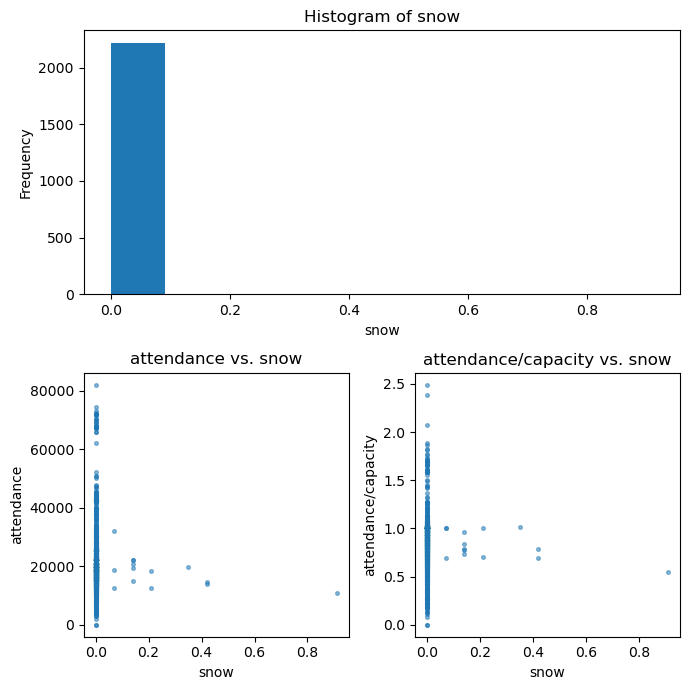

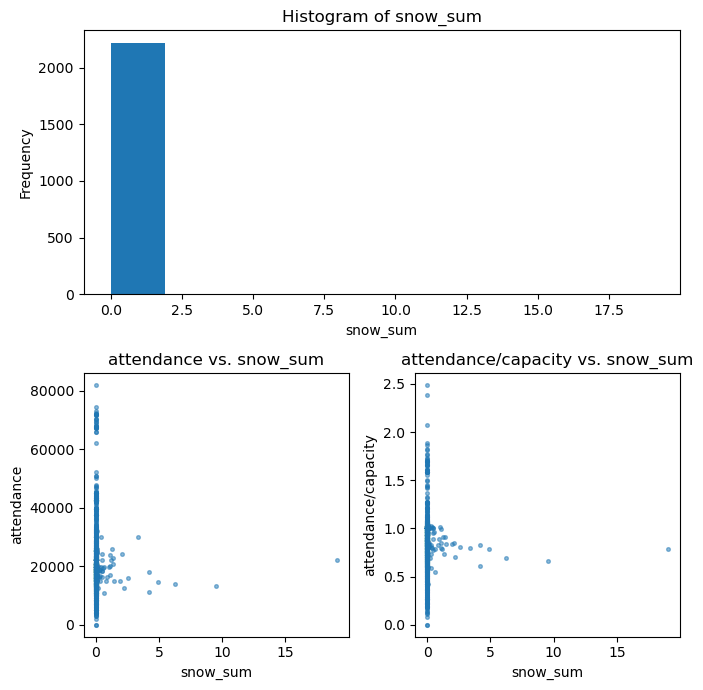

In [49]:
# Snow at kick off
make_hist_scatter(mlsall_df, 'snow')

# Snow prior to kick off
make_hist_scatter(mlsall_df, 'snow_sum')

Very few matches had snow. That is not surprising since MLS tries to avoid playing matches in winter and will typically suspend matches if the weather is poor.

In [50]:
# Regular season matches with non-zero snow at kick off
mlsall_df[(mlsall_df['snow']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time   latitude   longitude  \
count     14.000000         14.000000   14.000000  14.000000   14.000000   
mean   18068.571429          0.823370   18.214286  41.051429  -88.310714   
std     5519.320230          0.149977    2.524604   2.079848   13.730457   
min    10908.000000          0.545400   13.500000  38.870000 -111.890000   
25%    13979.500000          0.710627   16.250000  39.810000 -102.372500   
50%    18571.000000          0.784340   19.500000  39.830000  -81.970000   
75%    20429.250000          0.991280   19.500000  43.245000  -77.612500   
max    32250.000000          1.011031   22.500000  44.950000  -71.260000   

       real_home_team  temperature       rain       snow  cloudcover  \
count       14.000000    14.000000  14.000000  14.000000   14.000000   
mean         0.857143    32.214286   0.028571   0.245000   85.357143   
std          0.363137     3.430599   0.061125   0.225994   21.702914   
min          0.000000    25.600000   0.000000   0.070000   47.000000   
25%          1.000000    30.700000   0.000000   0.140000   67.750000   
50%          1.000000    31.850000   0.000000   0.140000  100.000000   
75%          1.000000    34.250000   0.000000   0.315000  100.000000   
max          1.000000    39.800000   0.200000   0.910000  100.000000   

       windspeed   windgust   rain_sum  snow_sum  playoff  same_conf  rivals  \
count  14.000000  14.000000  14.000000   14.0000     14.0  14.000000    14.0   
mean   17.992857  37.307143   2.842857    2.8300      0.0   0.571429     0.0   
std     7.340768  16.069774   6.779575    5.0102      0.0   0.513553     0.0   
min     7.700000  20.500000   0.000000    0.1400      0.0   0.000000     0.0   
25%    14.200000  22.575000   0.000000    0.4900      0.0   0.000000     0.0   
50%    17.100000  37.450000   0.000000    0.8400      0.0   1.000000     0.0   
75%    21.200000  44.025000   0.325000    2.1700      0.0   1.000000     0.0   
max    31.400000  69.100000  24.500000   19.0400      0.0   1.000000     0.0   

       home_opener  
count    14.000000  
mean      0.428571  
std       0.513553  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [51]:
# Regular season matches with non-zero snow prior to kick off
mlsall_df[(mlsall_df['snow_sum']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

attendance  att_div_capacity  local_time   latitude   longitude  \
count     47.000000         47.000000   47.000000  47.000000   47.000000   
mean   19217.170213          0.824803   18.021277  41.855106  -91.110000   
std     4931.293486          0.136969    2.340470   2.482731   16.365078   
min    10908.000000          0.426284   13.000000  38.870000 -122.690000   
25%    15612.000000          0.778985   16.000000  39.820000 -104.890000   
50%    18510.000000          0.827733   19.000000  40.740000  -87.620000   
75%    22182.500000          0.929424   19.500000  43.630000  -76.195000   
max    32250.000000          1.020412   22.500000  47.600000  -71.260000   

       real_home_team  temperature       rain       snow  cloudcover  \
count       47.000000    47.000000  47.000000  47.000000   47.000000   
mean         0.936170    36.527660   0.125532   0.072979   79.319149   
std          0.247092     8.119453   0.405113   0.165108   29.784083   
min          0.000000    13.700000   0.000000   0.000000    0.000000   
25%          1.000000    31.500000   0.000000   0.000000   60.500000   
50%          1.000000    35.500000   0.000000   0.000000   94.000000   
75%          1.000000    41.550000   0.100000   0.070000  100.000000   
max          1.000000    57.700000   2.600000   0.910000  100.000000   

       windspeed   windgust   rain_sum   snow_sum  playoff  same_conf  \
count  47.000000  47.000000  47.000000  47.000000     47.0  47.000000   
mean   16.640426  35.446809   3.702128   1.727660      0.0   0.702128   
std     9.068164  16.519881   6.416978   3.165487      0.0   0.462267   
min     1.100000   9.000000   0.000000   0.070000      0.0   0.000000   
25%     8.850000  21.200000   0.000000   0.315000      0.0   0.000000   
50%    16.100000  34.600000   0.400000   0.630000      0.0   1.000000   
75%    23.850000  47.150000   5.200000   1.435000      0.0   1.000000   
max    35.000000  69.800000  27.700000  19.040000      0.0   1.000000   

          rivals  home_opener  
count  47.000000    47.000000  
mean    0.063830     0.489362  
std     0.247092     0.505291  
min     0.000000     0.000000  
25%     0.000000     0.000000  
50%     0.000000     0.000000  
75%     0.000000     1.000000  
max     1.000000     1.000000

There have been 14 matches with snow at kick off and 47 that had snow prior to kick off (there is overlap between the two).

The average attendance for these matches was 82.3% and 82.4%, respectively. This is a little less than the overall average.

**Cloud cover**

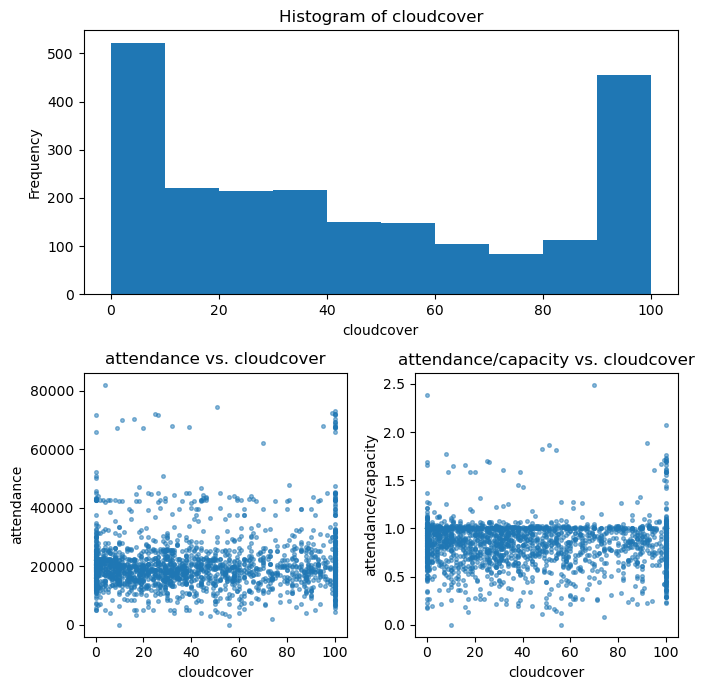

In [52]:
# Cloud cover at kick off
make_hist_scatter(mlsall_df, 'cloudcover')

The cloud cover describes the percentage of the sky covered by clouds. Most matches had either 0 or 100% cloud cover, but values in between are well represented.

There is no obvious trend between attendance and cloud cover.

**Windspeed and windgust speed**

Windspeed is the average speed of the wind in km/h.

Windgust speed is the speed of the gusts of wind in km/h.

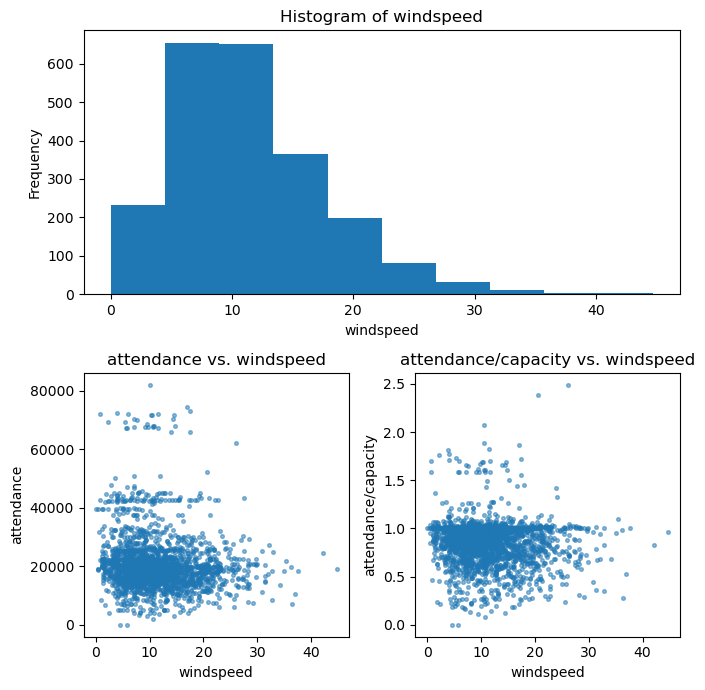

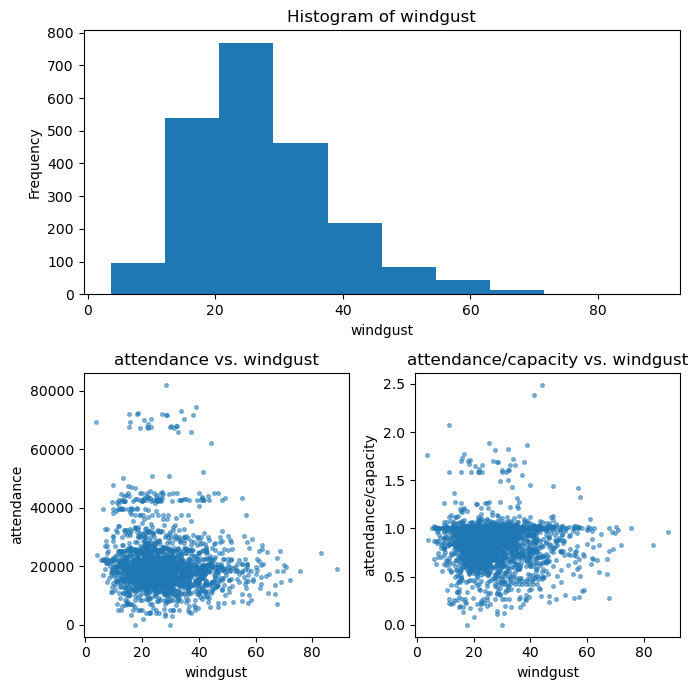

In [53]:
# Windspeed at kick off
make_hist_scatter(mlsall_df, 'windspeed')

# Windgust speed at kick off
make_hist_scatter(mlsall_df, 'windgust')

The scatterplots don't seem to have a strong trend with attendance.

The distributions and scatterplots for windspeed and windgust speed look very similar. Let's check out the scatterplot of windspeed vs windgust below.

<Axes: xlabel='windspeed', ylabel='windgust'>

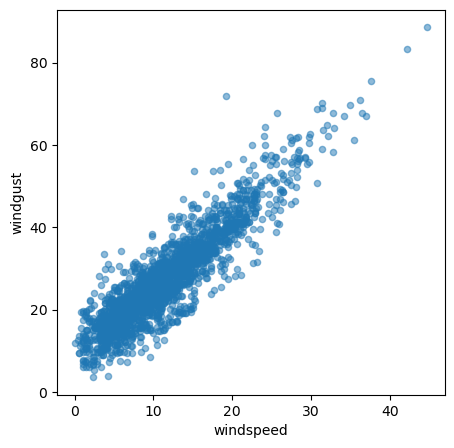

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

mlsall_df.plot.scatter(x='windspeed',
                       y='windgust',
                       ax=ax,
                       alpha=0.5)

There is a strong correlation between windspeed and windgust, so at most one of these features would be used for the model.

**Attendance vs. Regular Season/Playoffs**

Below, I look at how attendance changes from the regular season to the playoffs. There are far more regular season matches, but still a solid sample of playoff matches.

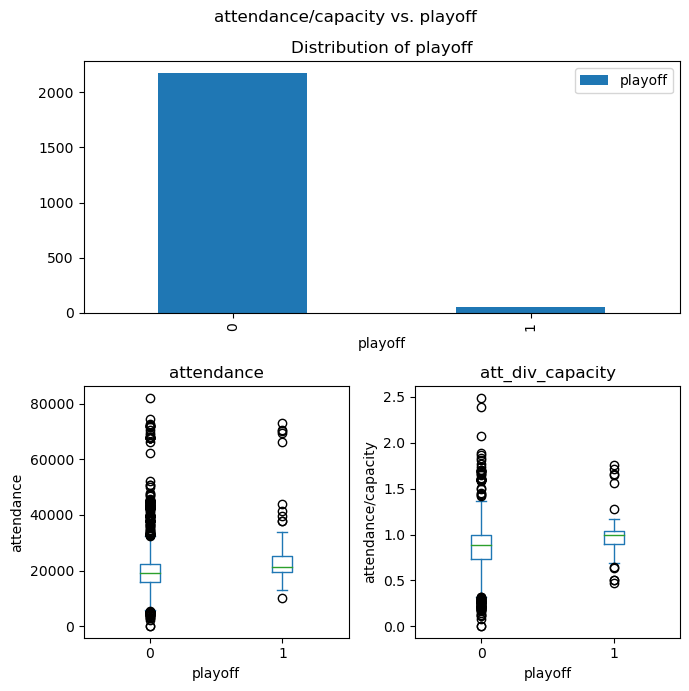

In [55]:
make_bar_box(mlsall_df, 'playoff')

In [56]:
mlsall_df.groupby('playoff').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude  longitude  \
playoff                                                                     
0        20662.514036          0.848134   18.362901  38.774340 -93.943580   
1        26786.964286          0.997887   17.151786  39.509643 -95.334643   

         real_home_team  temperature      rain      snow  cloudcover  \
playoff                                                                
0              0.992637    70.819650  0.202209  0.001578   44.518638   
1              0.982143    53.539286  0.217857  0.000000   41.607143   

         windspeed   windgust  rain_sum  snow_sum  playoff  same_conf  \
playoff                                                                 
0        11.429222  27.445559  2.003405  0.037368      0.0   0.769903   
1        10.930357  25.194643  1.833929  0.001250      1.0   0.928571   

           rivals  home_opener  
playoff                         
0        0.080994     0.055683  
1        0.089286     0.000000

Playoff matches have very good attendance figures. They average nearly 100% attendance compared to 84.7% for regular season matches. They get over 6000 more people on average.

**Attendance vs. real home team**

On some occasions, teams were forced to play "home" matches away from their actual home stadium. Most of these were Canadian teams that were forced to play some of their home matches in the US (Montreal and Toronto had to play in Orlando and Vancouver had to play in Utah) during the pandemic. New York City FC also had to play a few matches in the home stadium of the New York Red Bulls.

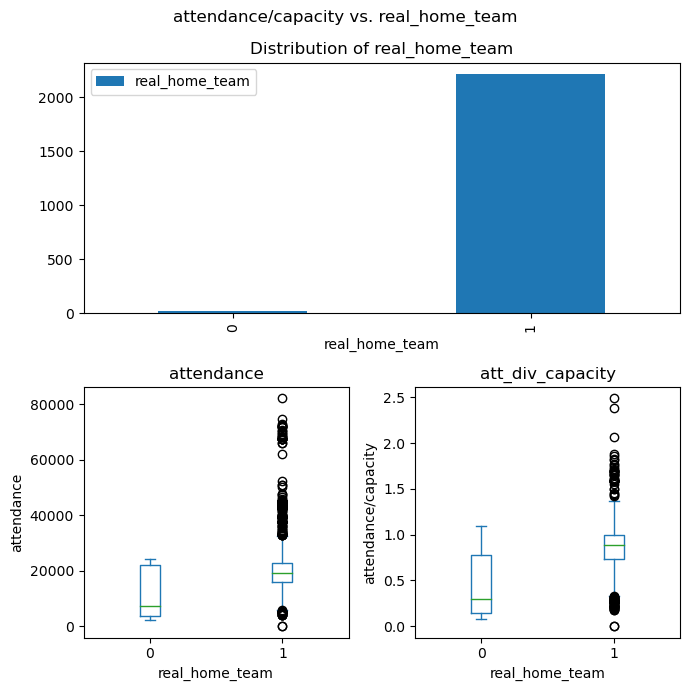

In [57]:
make_bar_box(mlsall_df, 'real_home_team')

In [58]:
mlsall_df.groupby('real_home_team').agg({x:'mean' for x in num_feats})

attendance  att_div_capacity  local_time   latitude  \
real_home_team                                                          
0               11088.588235          0.428912   18.235294  40.454706   
1               20891.142405          0.855147   18.333220  38.780041   

                longitude  real_home_team  temperature      rain      snow  \
real_home_team                                                               
0              -80.257647             0.0    68.688235  0.123529  0.016471   
1              -94.083978             1.0    70.398553  0.203210  0.001424   

                cloudcover  windspeed   windgust  rain_sum  snow_sum  \
real_home_team                                                         
0                57.470588  13.894118  30.094118  1.652941  1.218824   
1                44.345389  11.397649  27.368219  2.001808  0.027373   

                 playoff  same_conf    rivals  home_opener  
real_home_team                                              
0               0.058824   0.764706  0.000000     0.058824  
1               0.024864   0.773960  0.081826     0.054250

Not surprisingly, the attendance drops dramatically when neither team is really the home team. On average, matches without a real home team only averaged 42.9% attendance. When there was no real home team, the average attendance was just 11,089, which is awful.

### Summary

Trends I noticed in the data:

**Months**: There is some evidence that attendance does change from month to month. Other factors might be responsible, but it does look like attendance might improve as the season progresses.

**Day of the week**: It looks like Sundays might be the best for attendance while Wednesdays are the worst. However, it is possible that Sundays had the highest average attendance because more marquee matches were scheduled for Sundays.

**Time of day**: There is some evidence that early/mid afternoon matches might be slightly better than late afternoon or night matches.

**Rivals**: It does look like there could be a significant increase in attendance when two rivals are playing.

**Home team, away team**: The models will definitely need to take into account which teams are playing as there is significant variation between them.

**Weather**: Cold temperatures do appear to be correlated with lower attendance. Other than that, there were not any clear trends with other weather features.

The models that I create should do a better job of finding real trends because the models will do a better job of accounting for correlations between features. For example, it is possible that once the relative averages of each home team are taken into account, some trends seen here might disappear while others not seen here become apparent.